<a href="https://colab.research.google.com/github/marioklau/Data_Mining/blob/main/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('clean_dataset.csv')

In [ ]:
df.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat (Rp)
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001-1.250.000
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001-500.000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip,dokter umum,<100000
3,4,vertigo,poliklinik,garut,klinik bhakti ip,dokter umum,<100000
4,5,check up,laboratorium,garut,laboratorium,dokter umum,500.001-750.000


##UNIVARIATE ANALYSIS

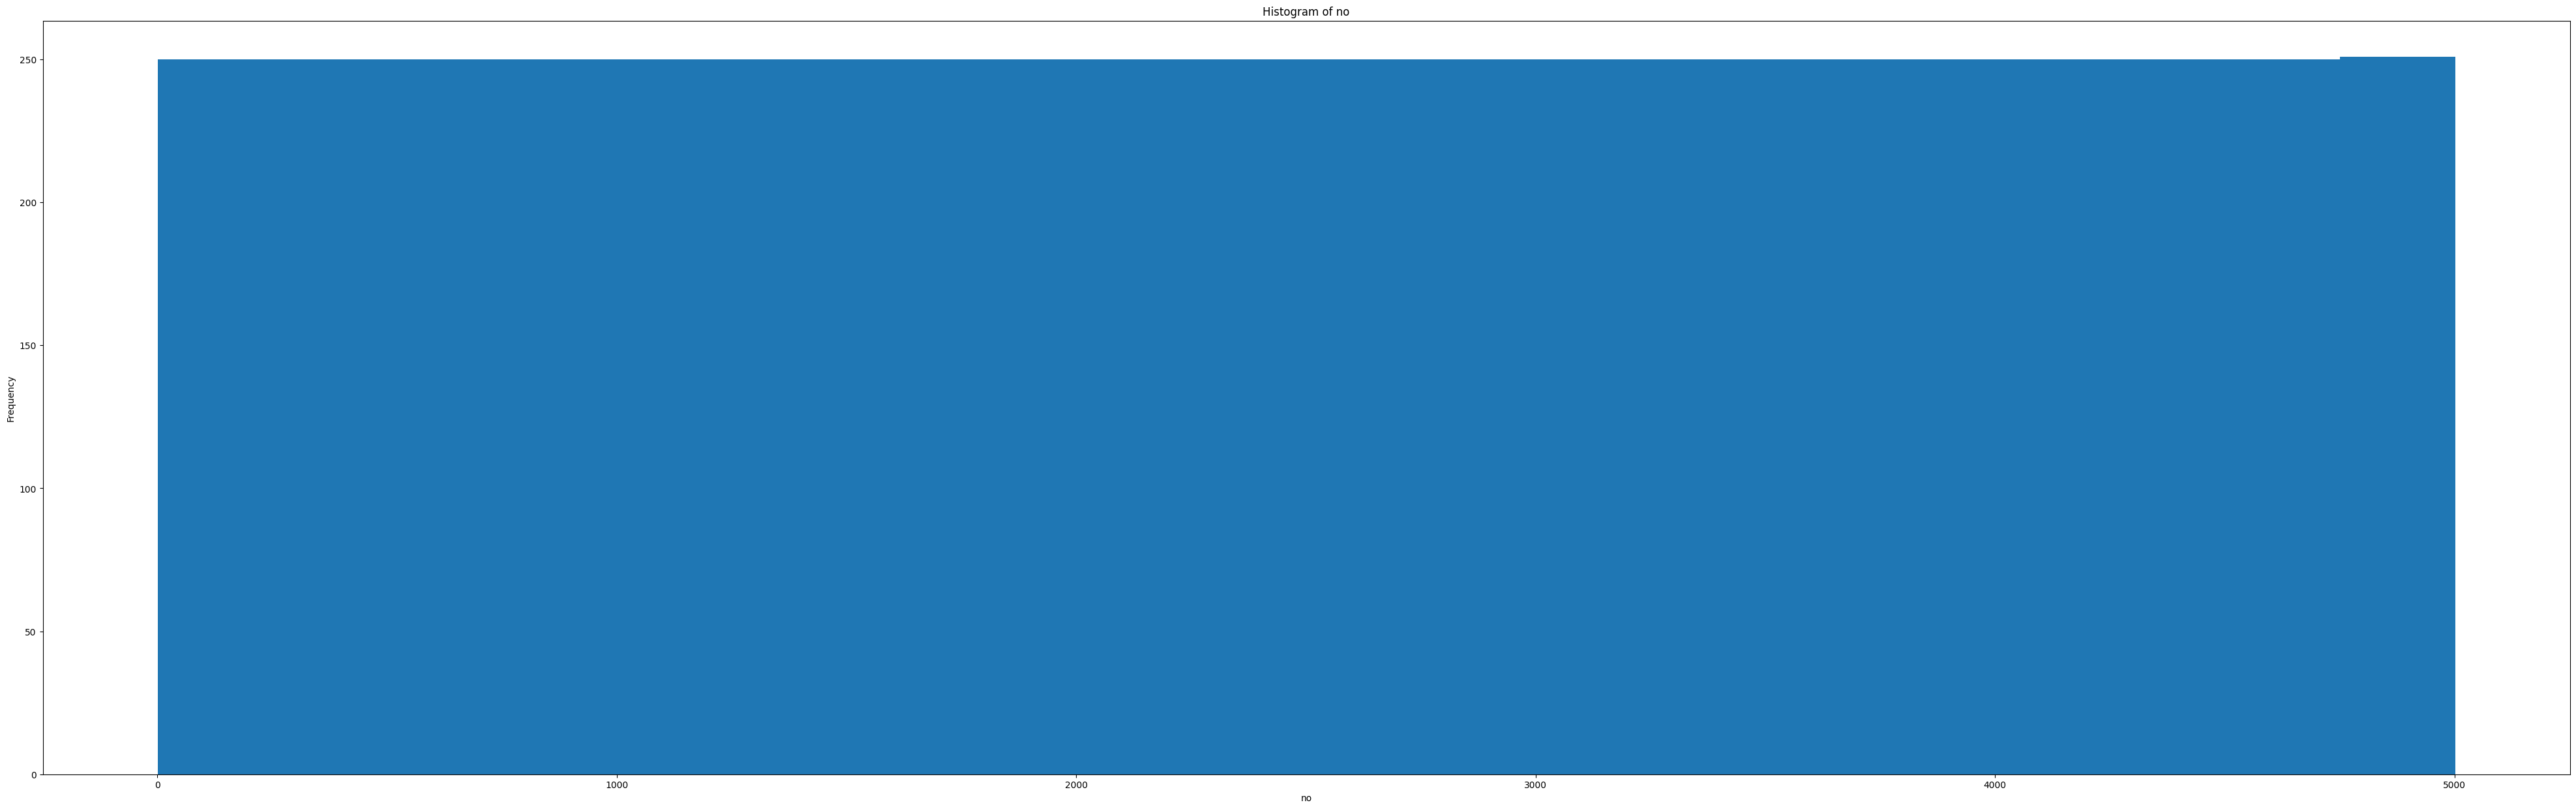

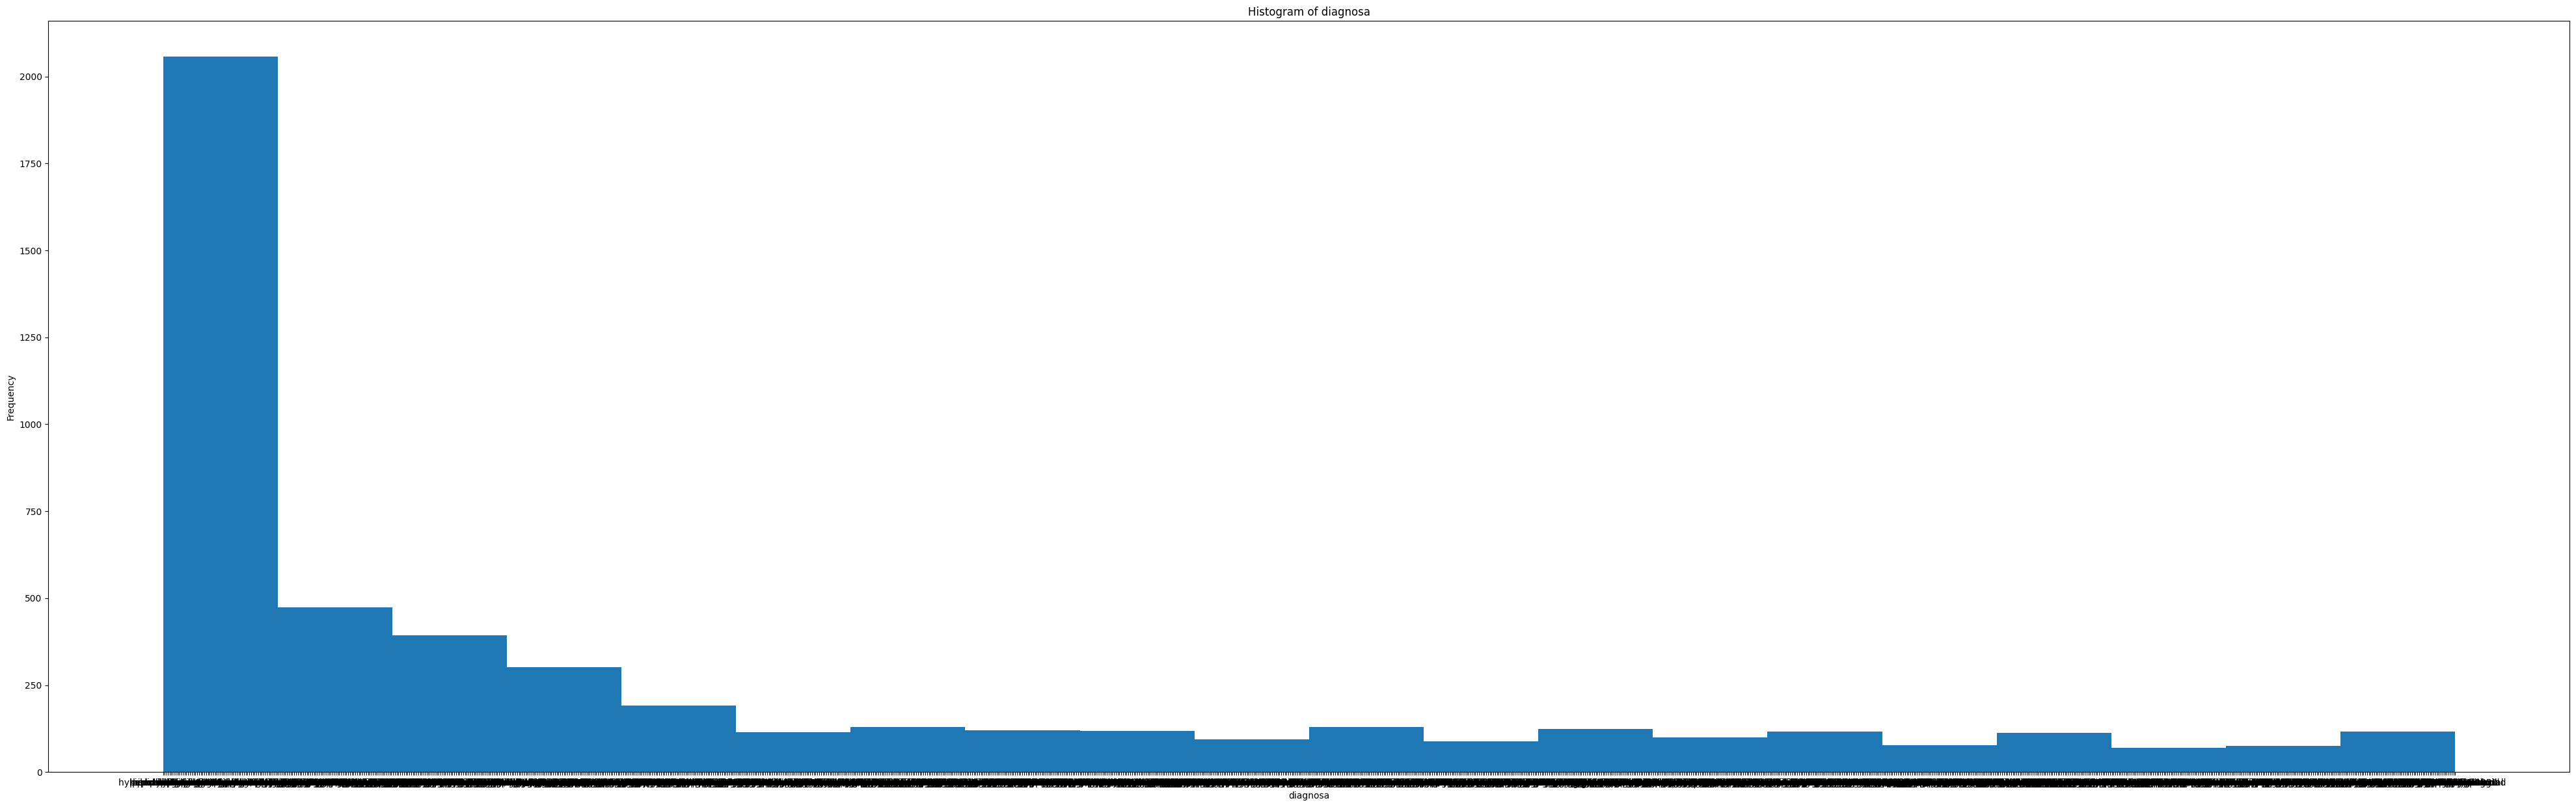

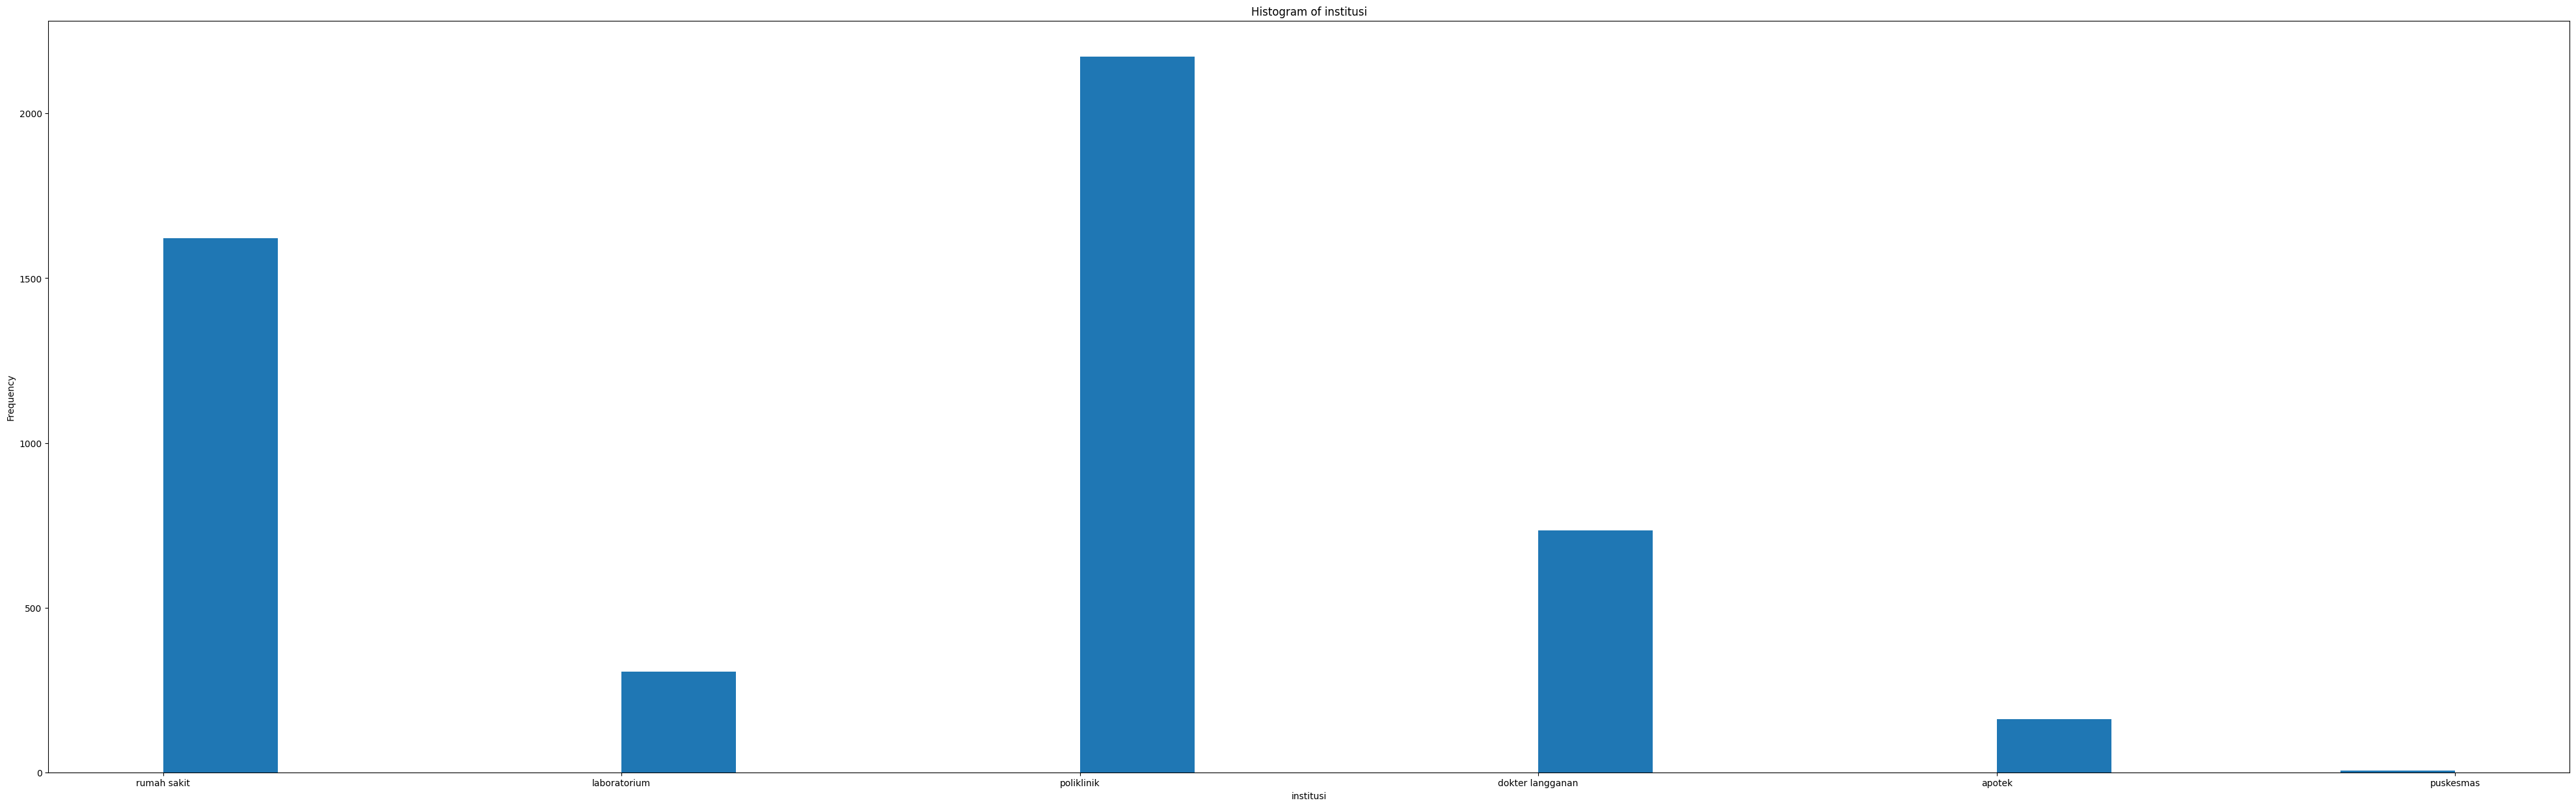

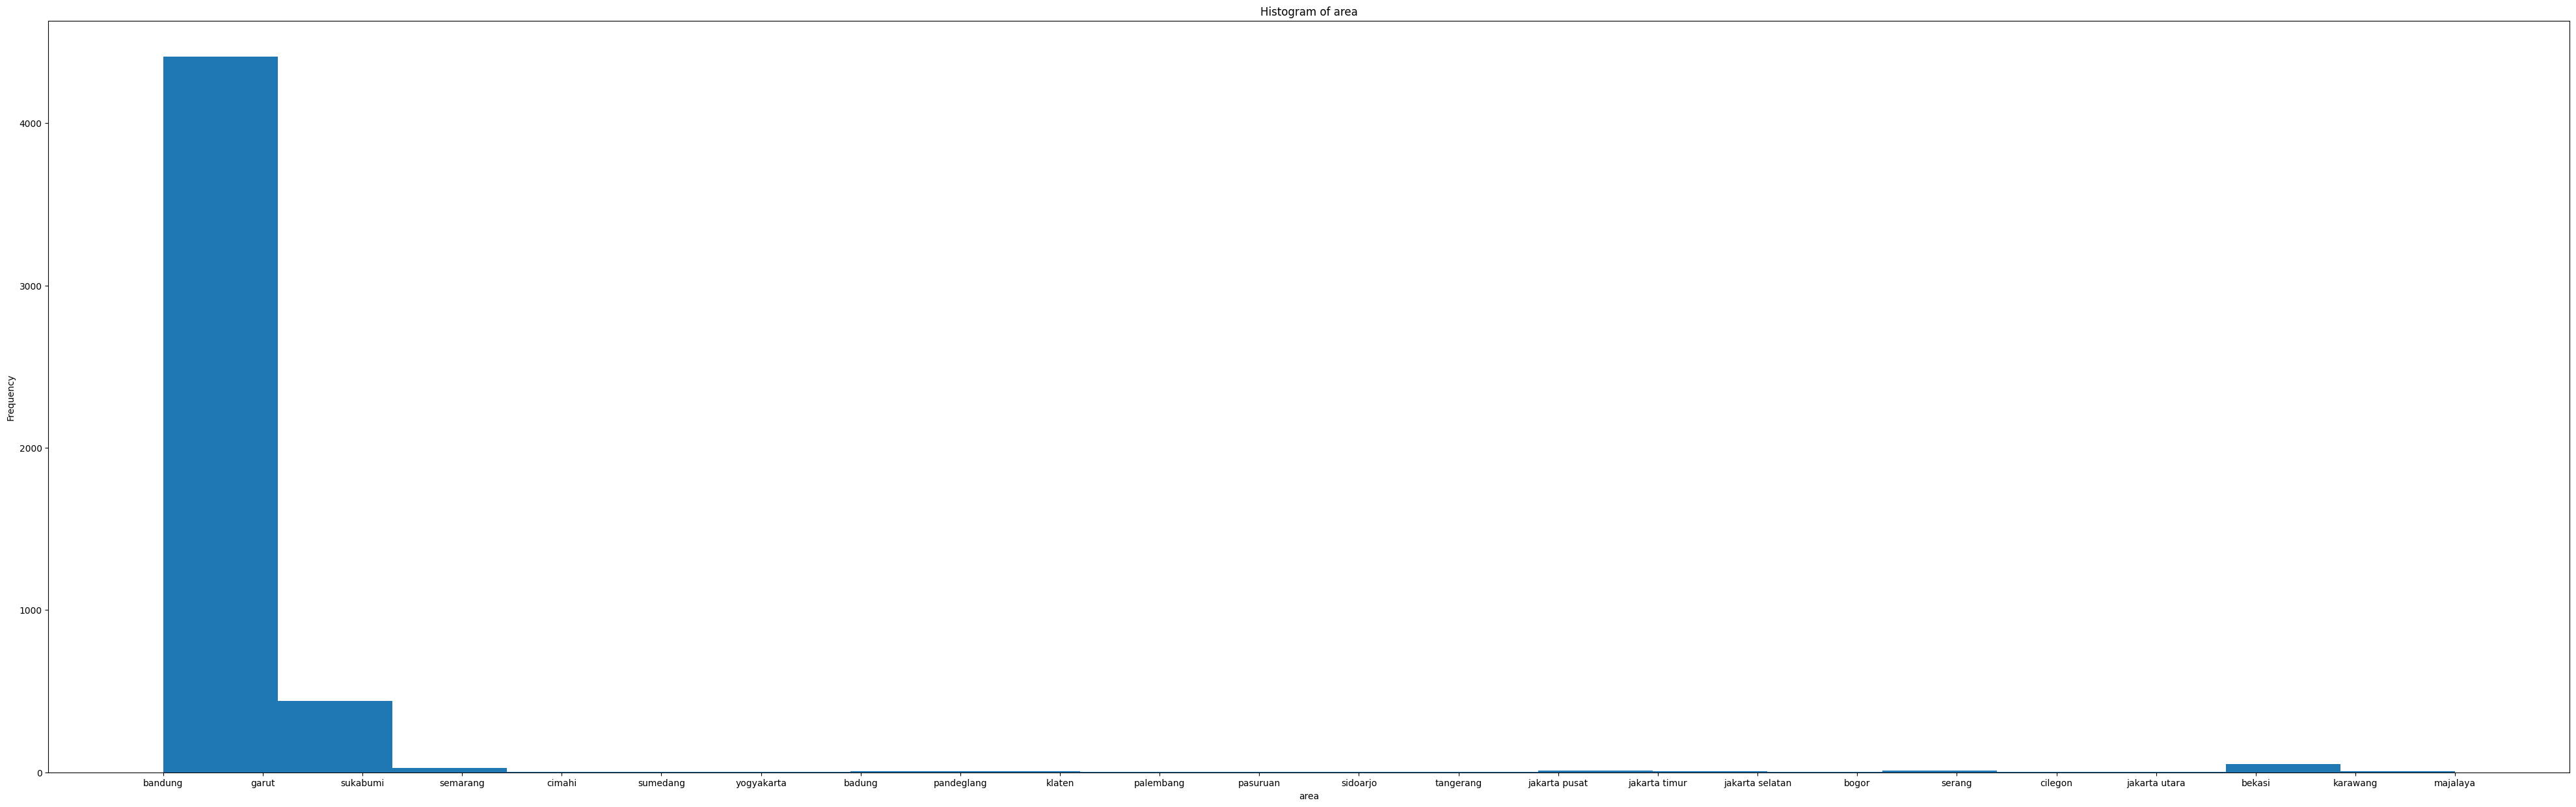

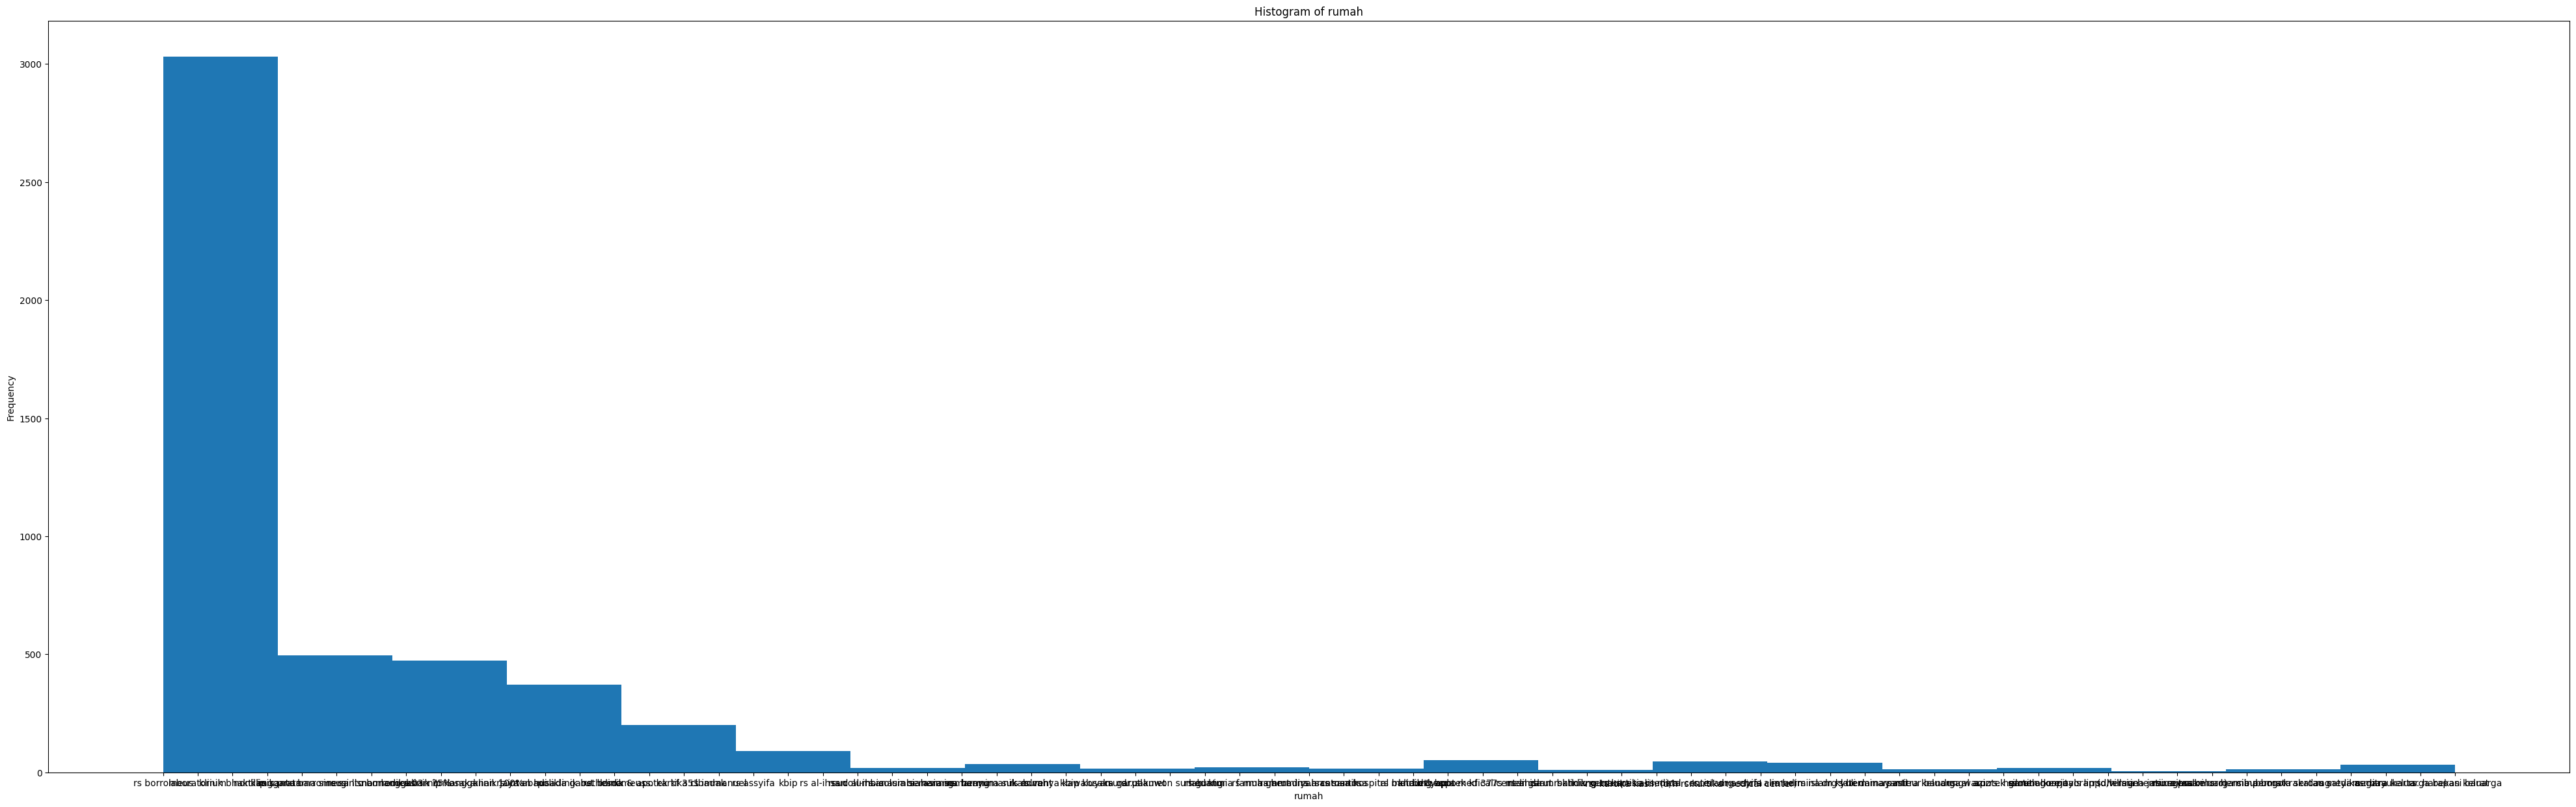

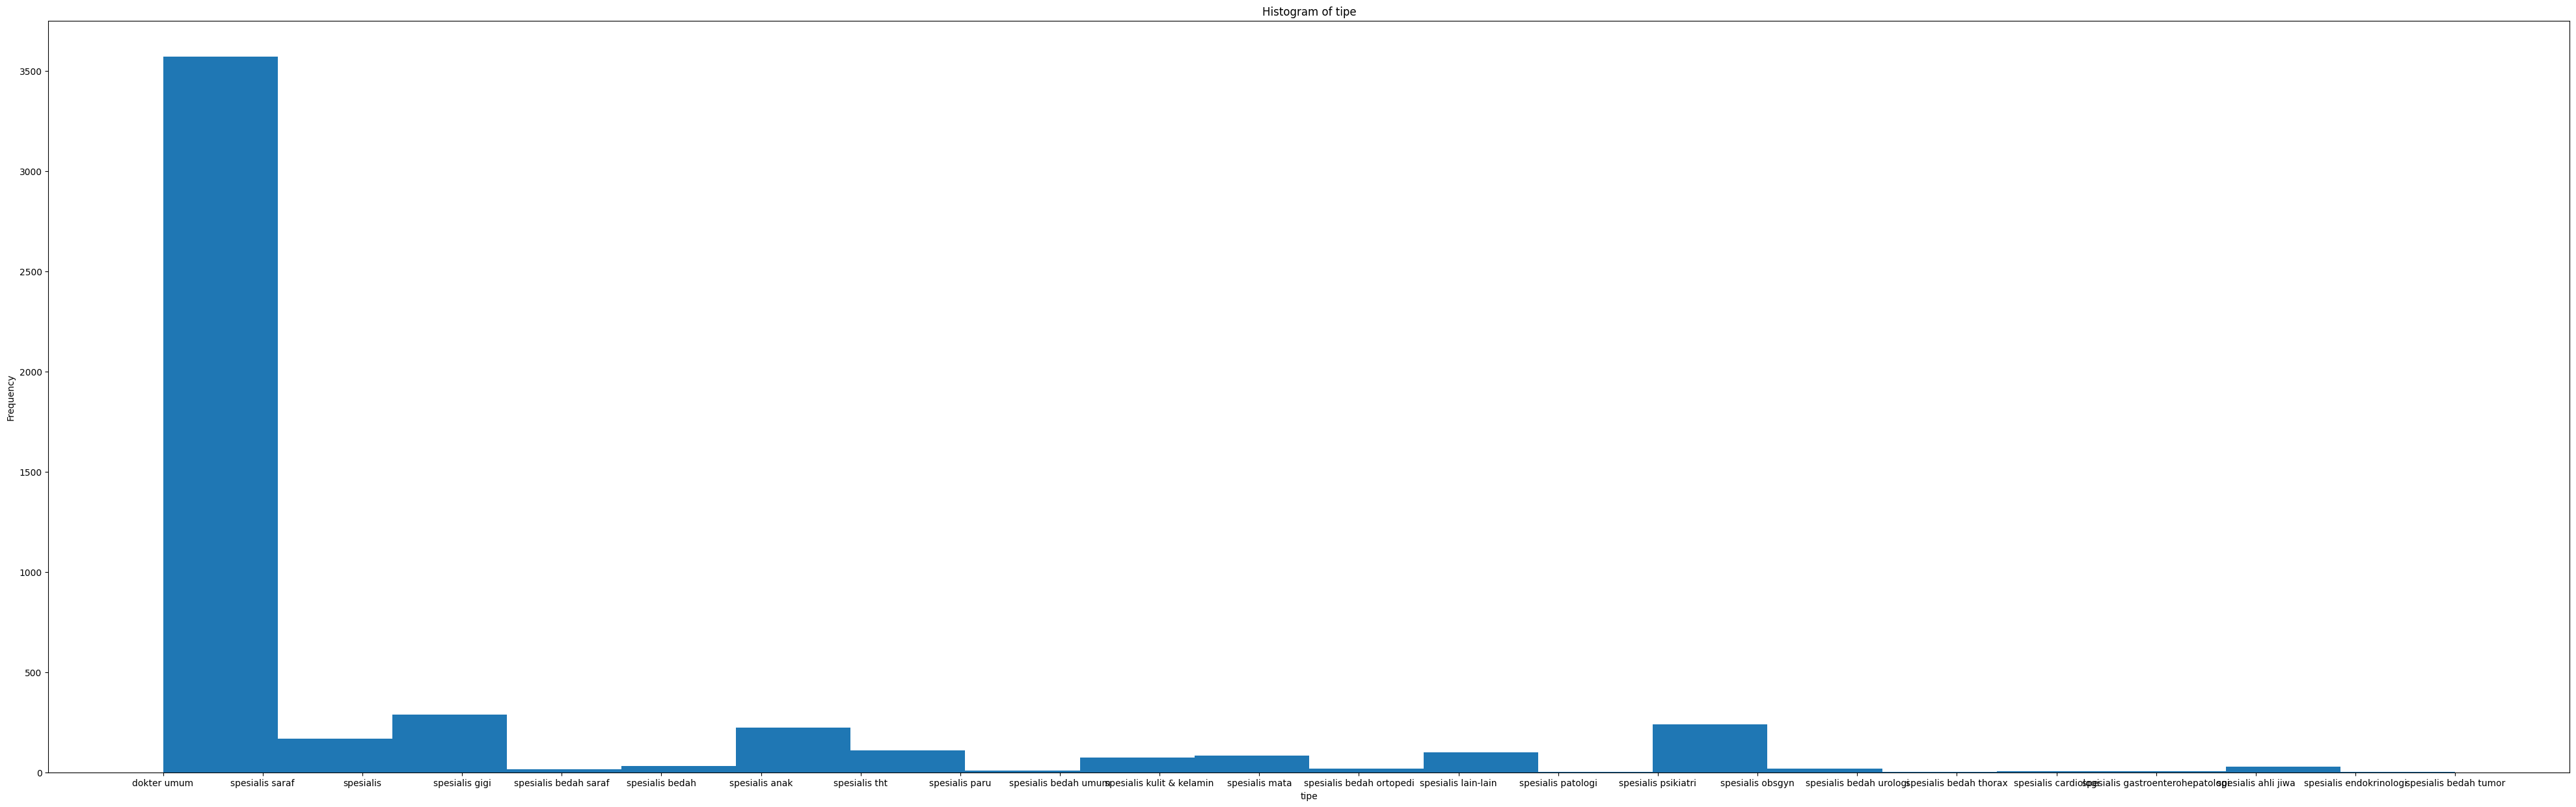

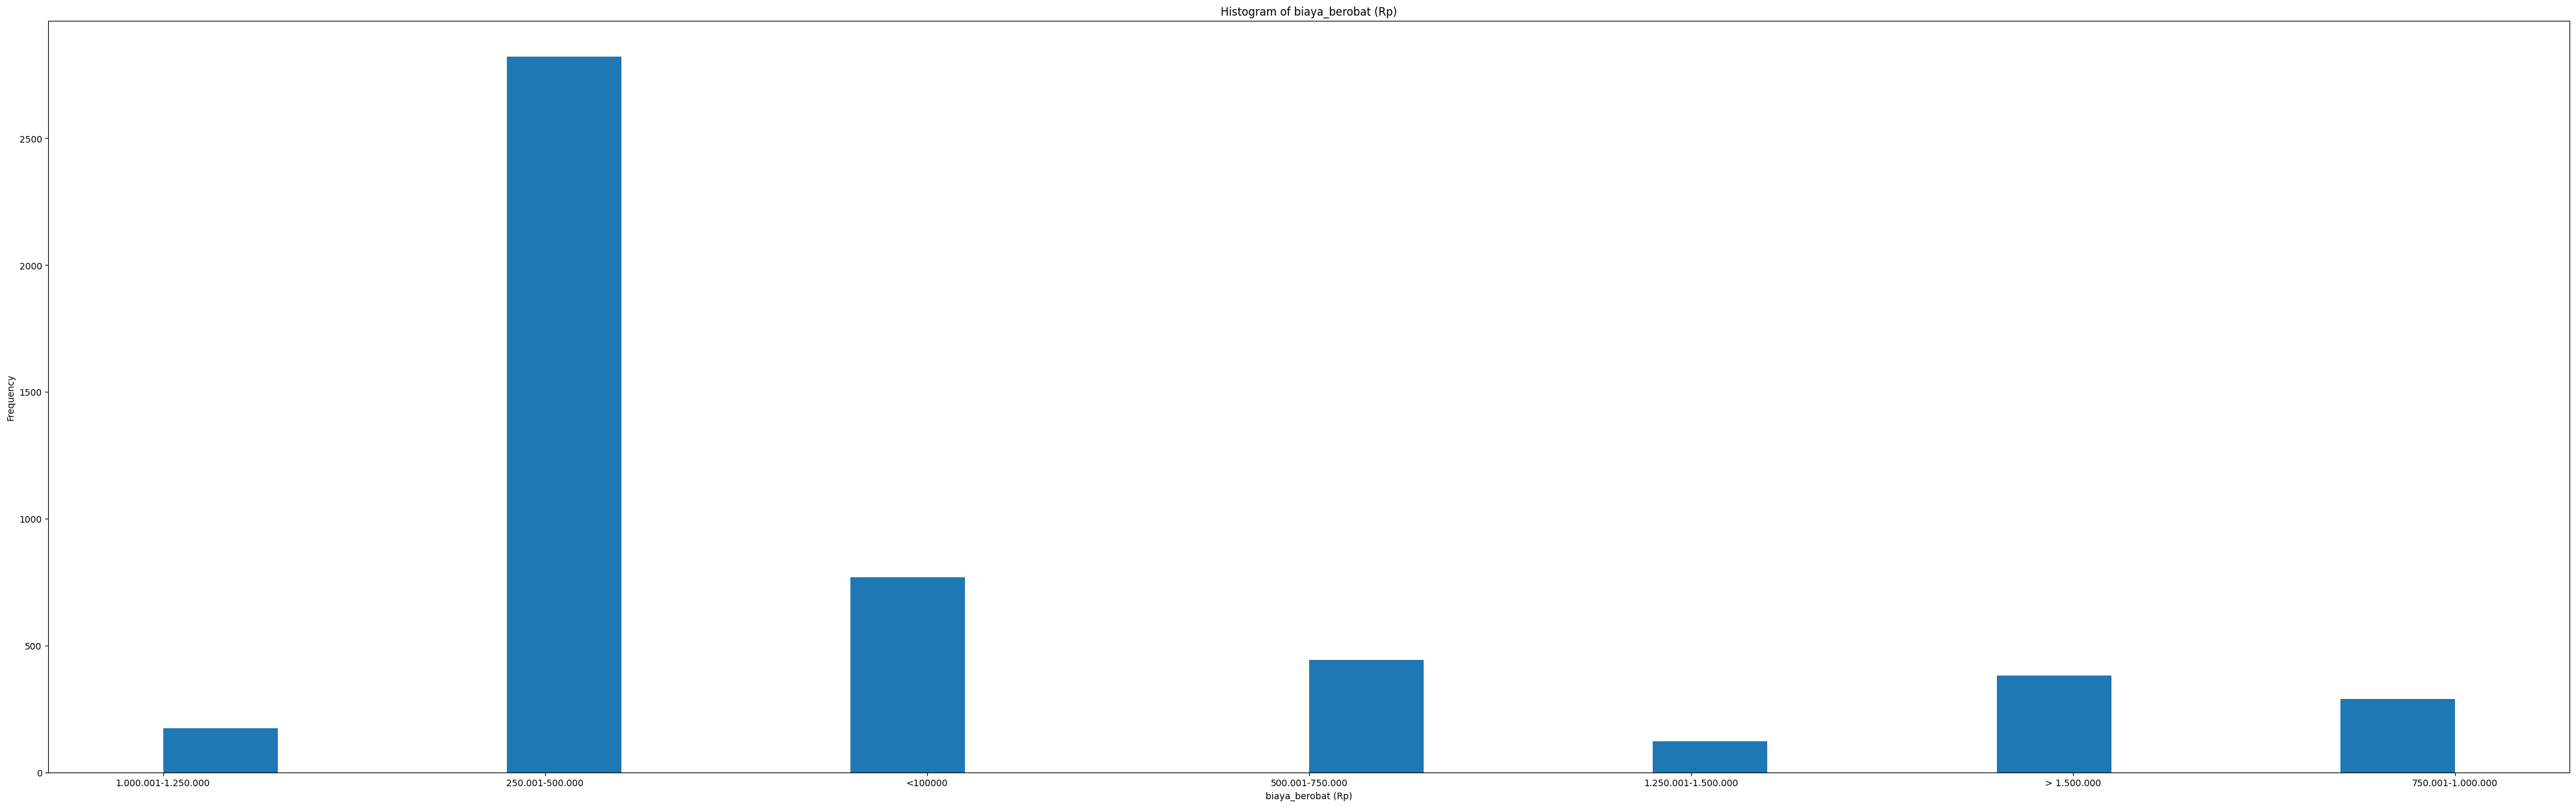

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(50, 15))  # Atur lebar dan panjang diagram
  plt.hist(df[column], bins=20)  # Buat histogram dengan 20 bins
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

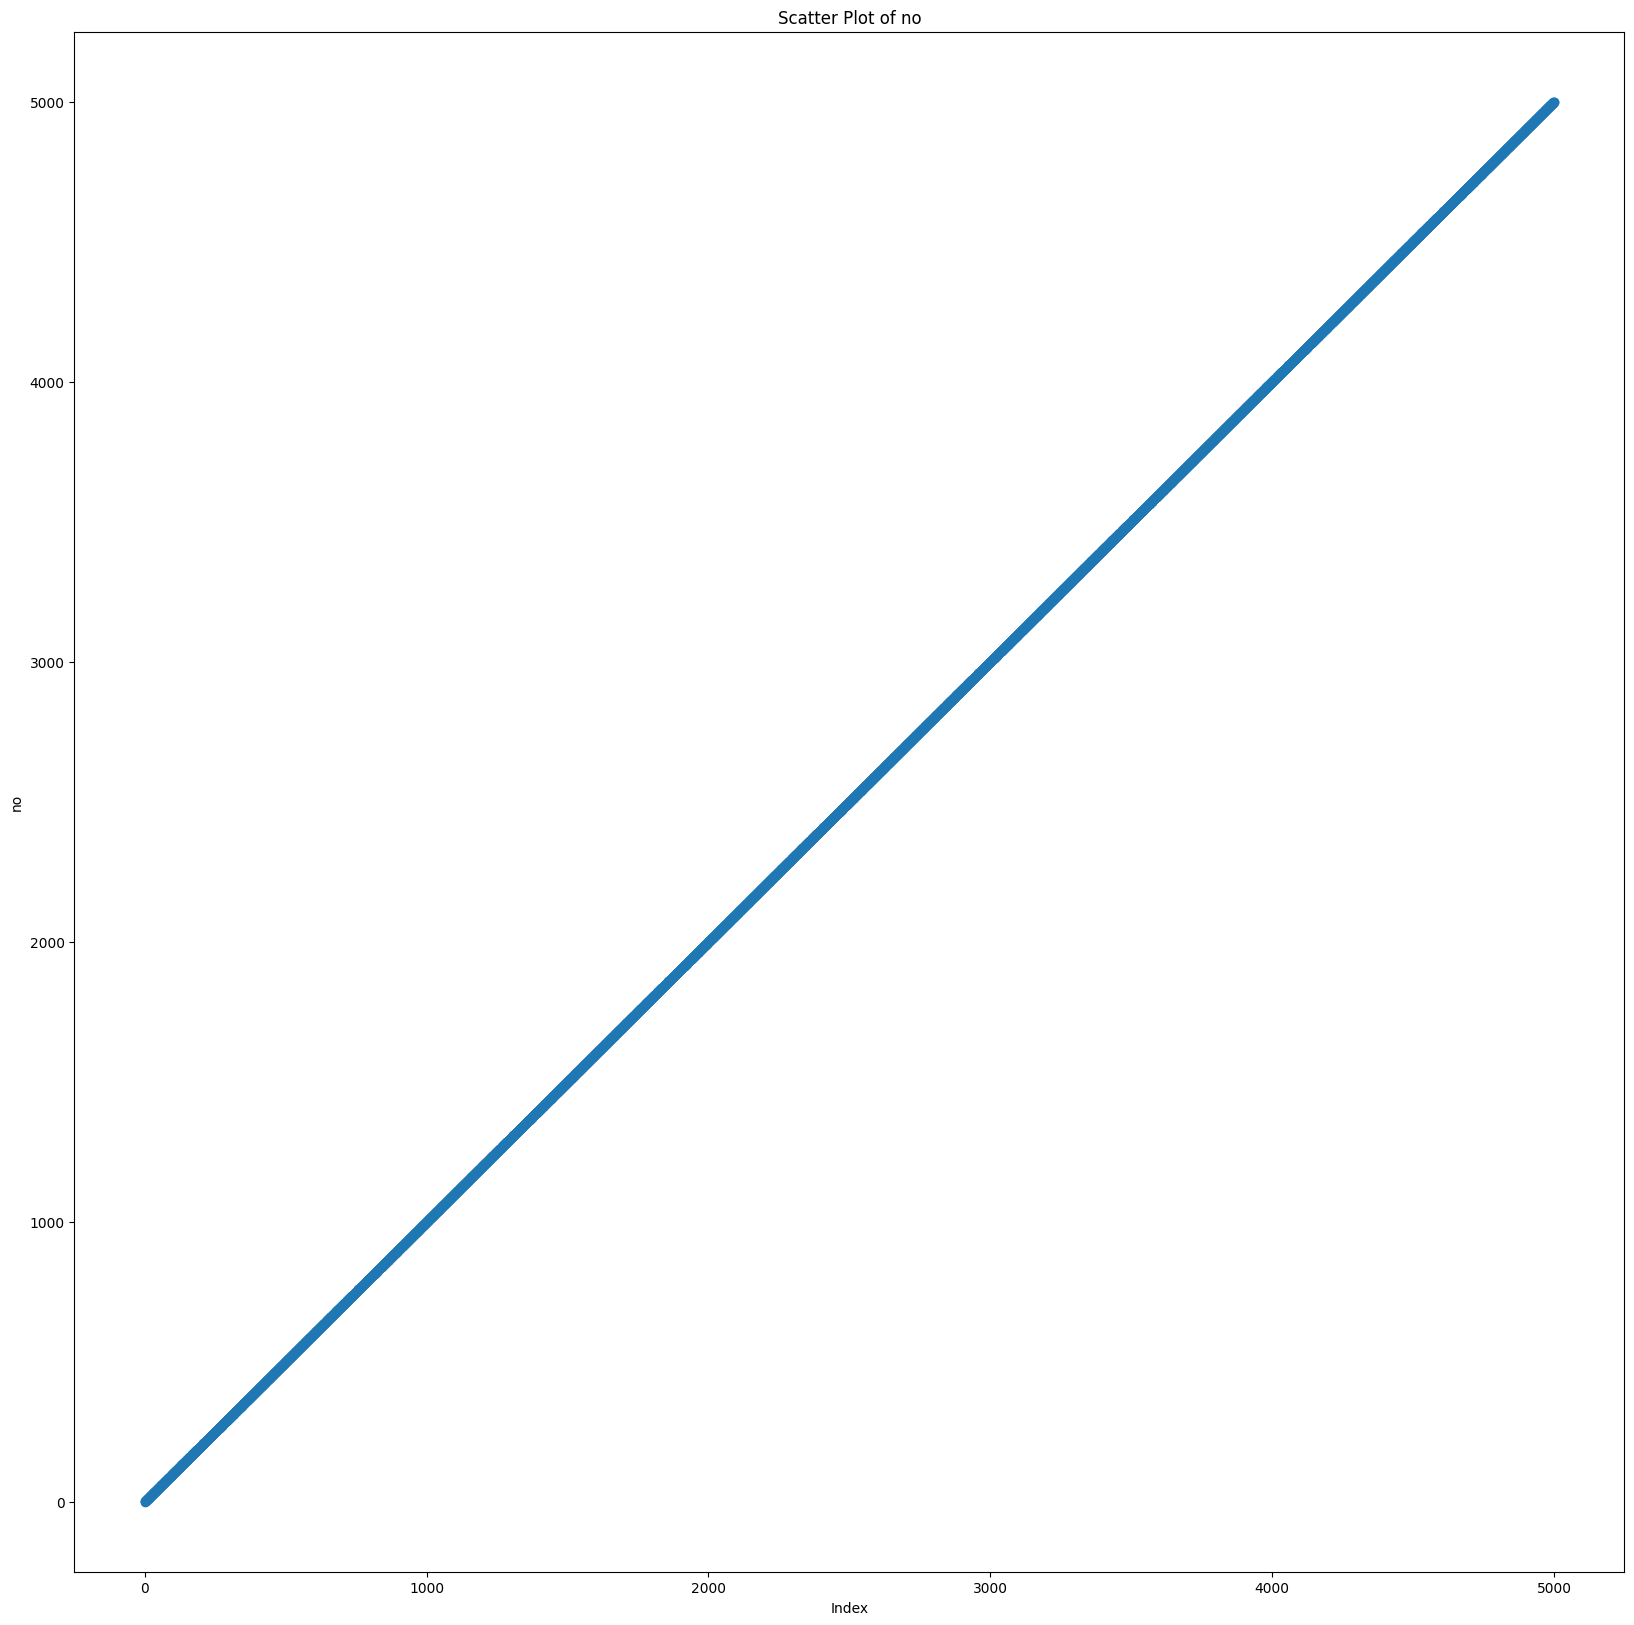

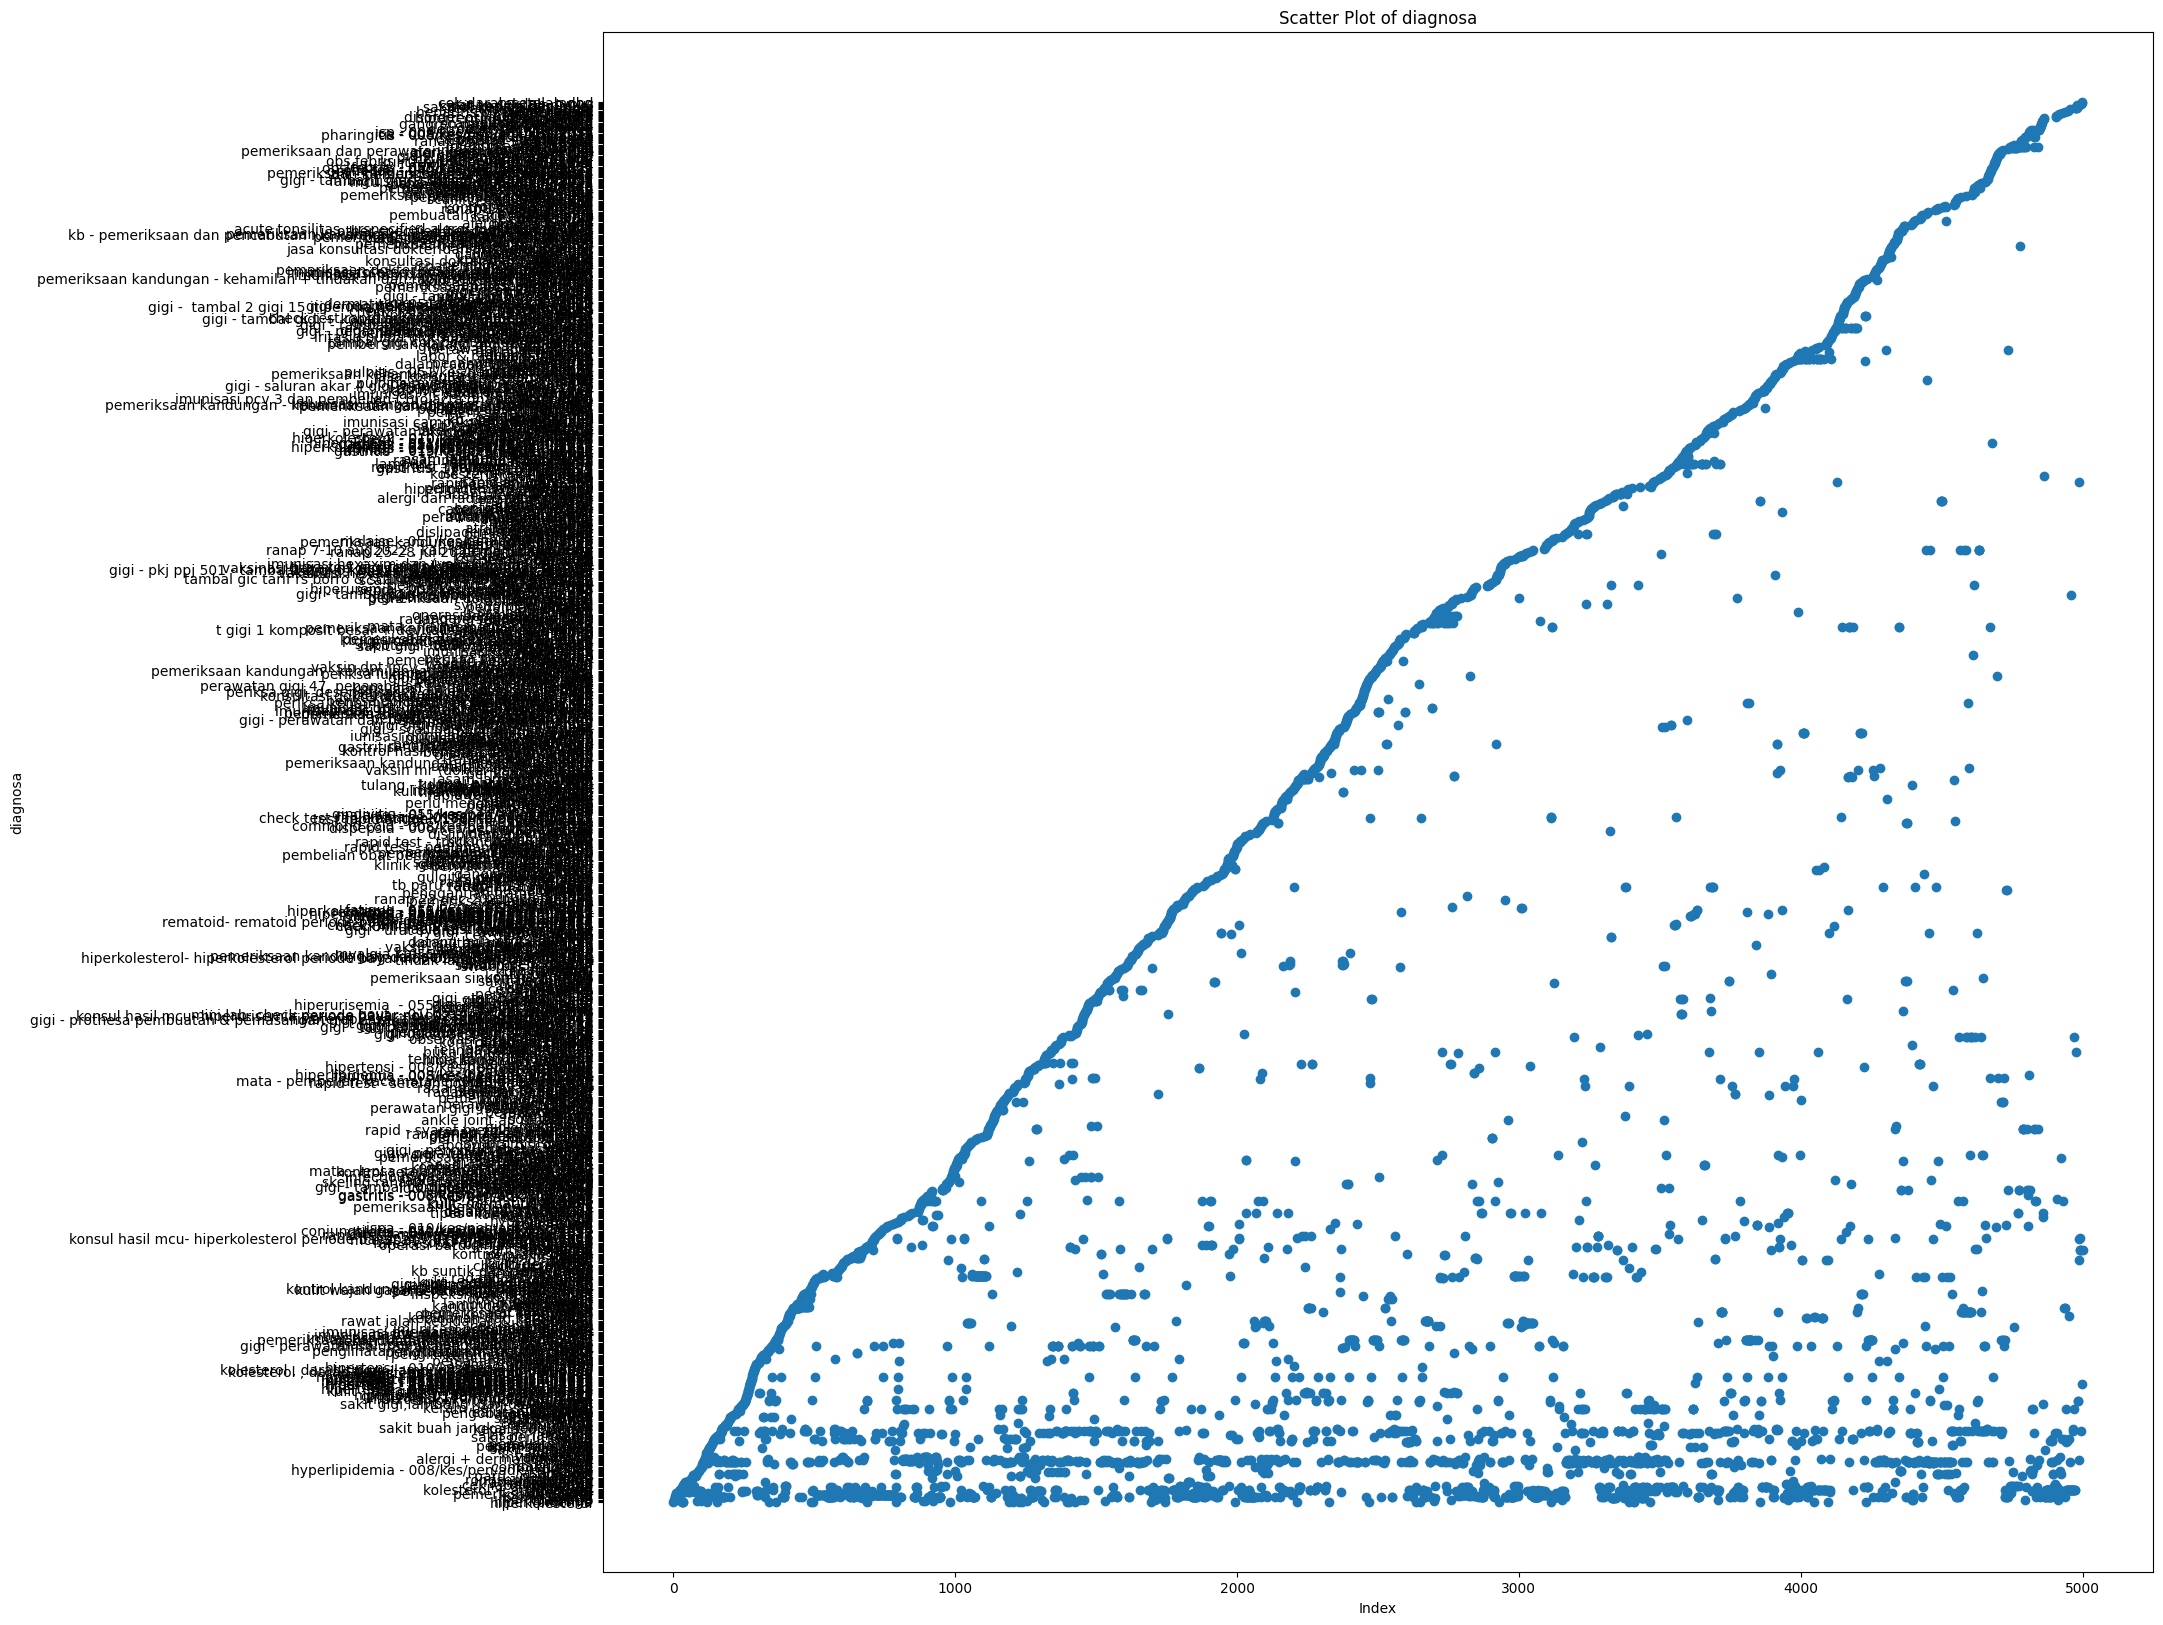

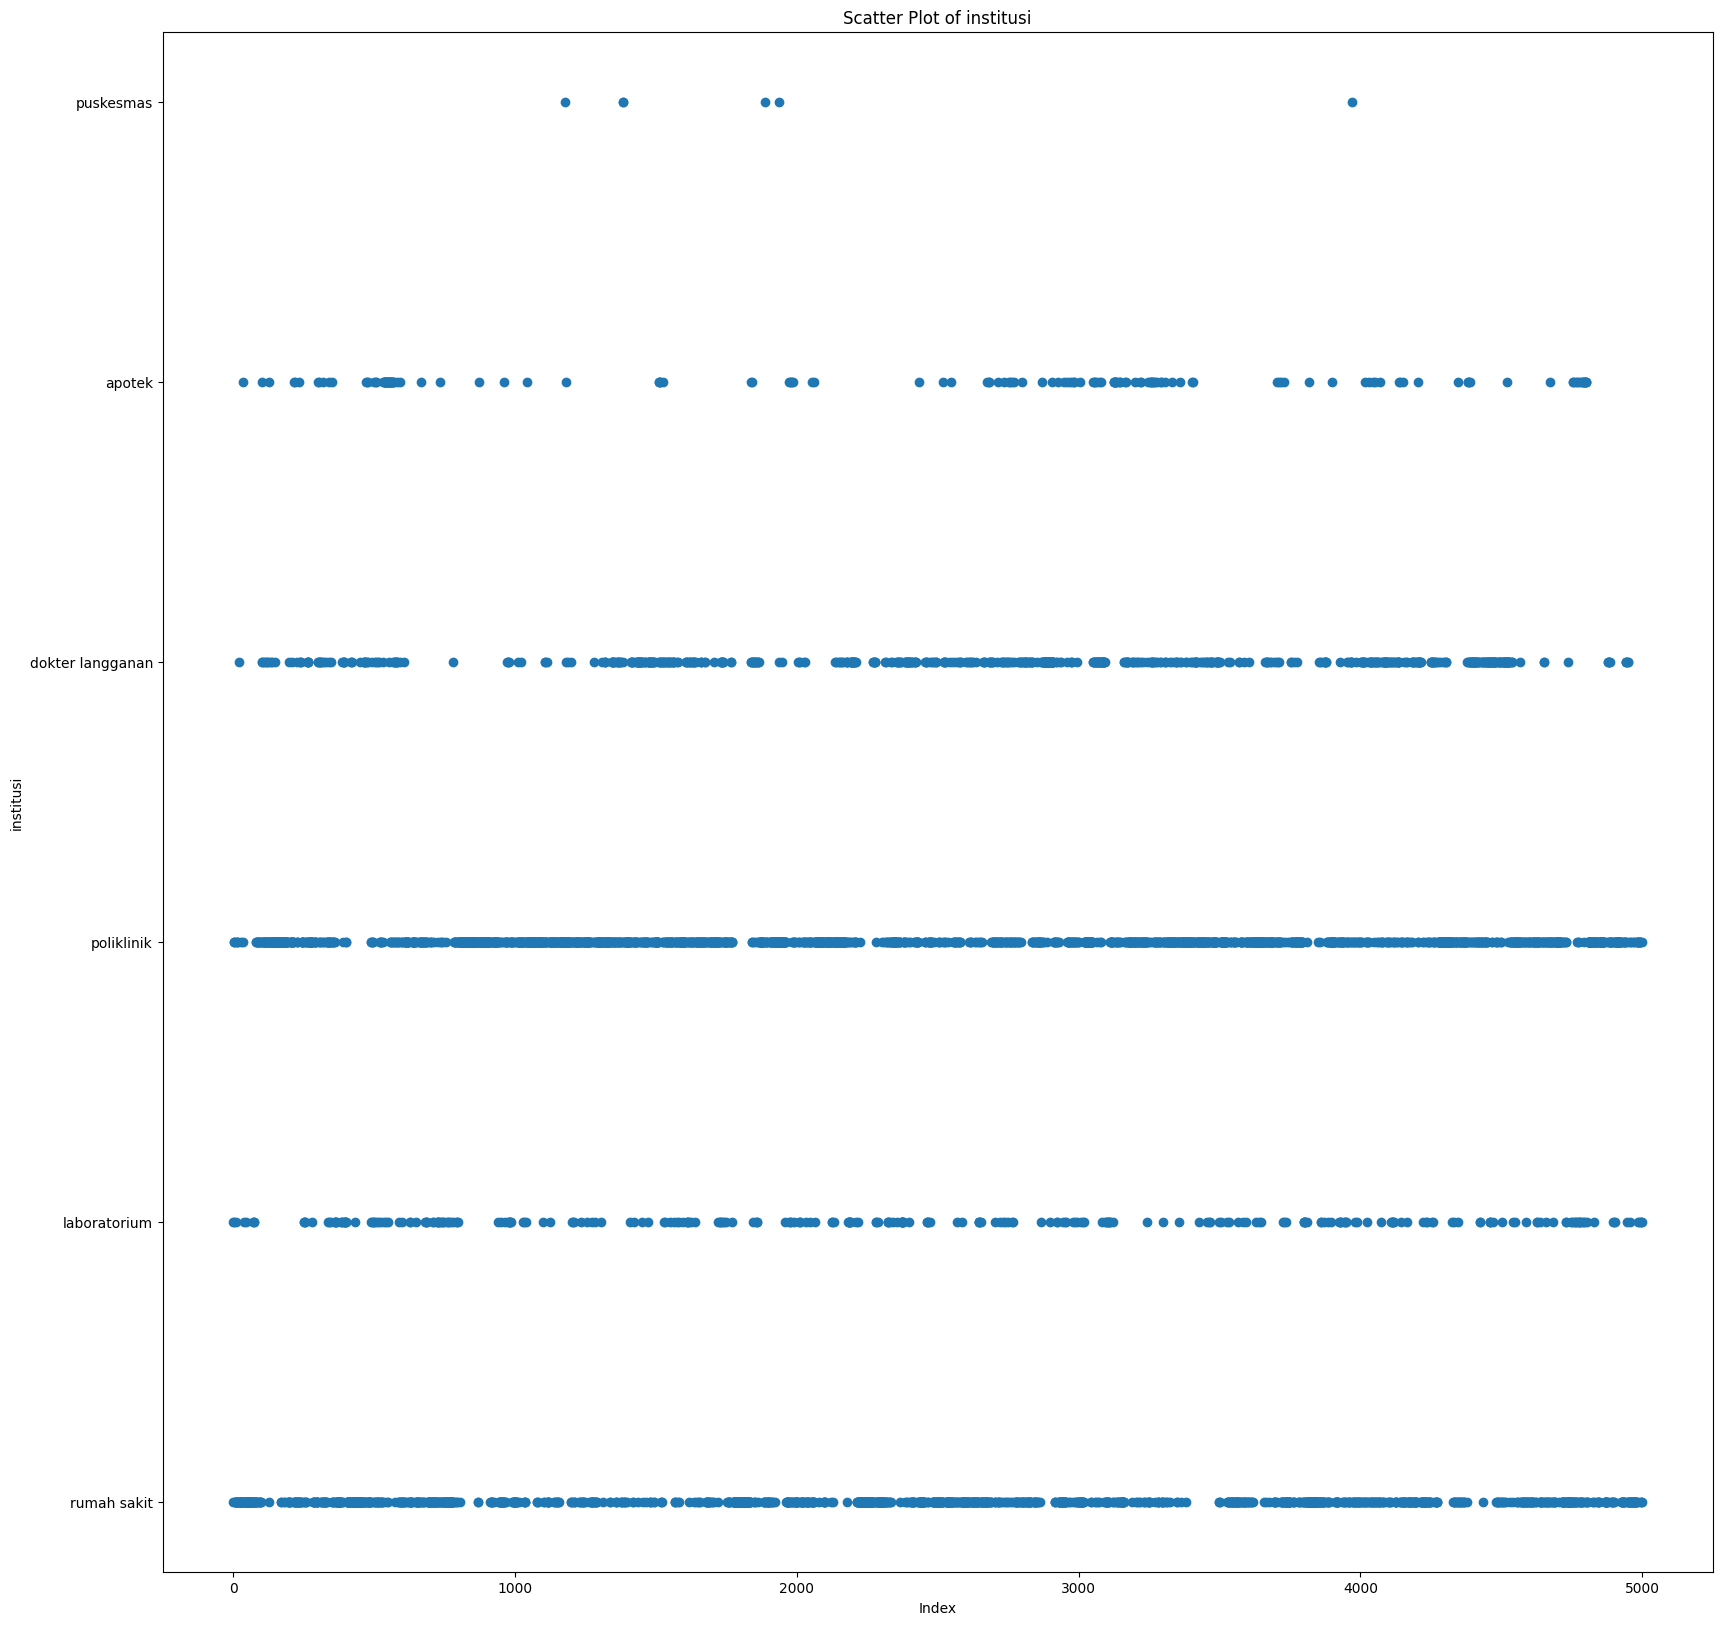

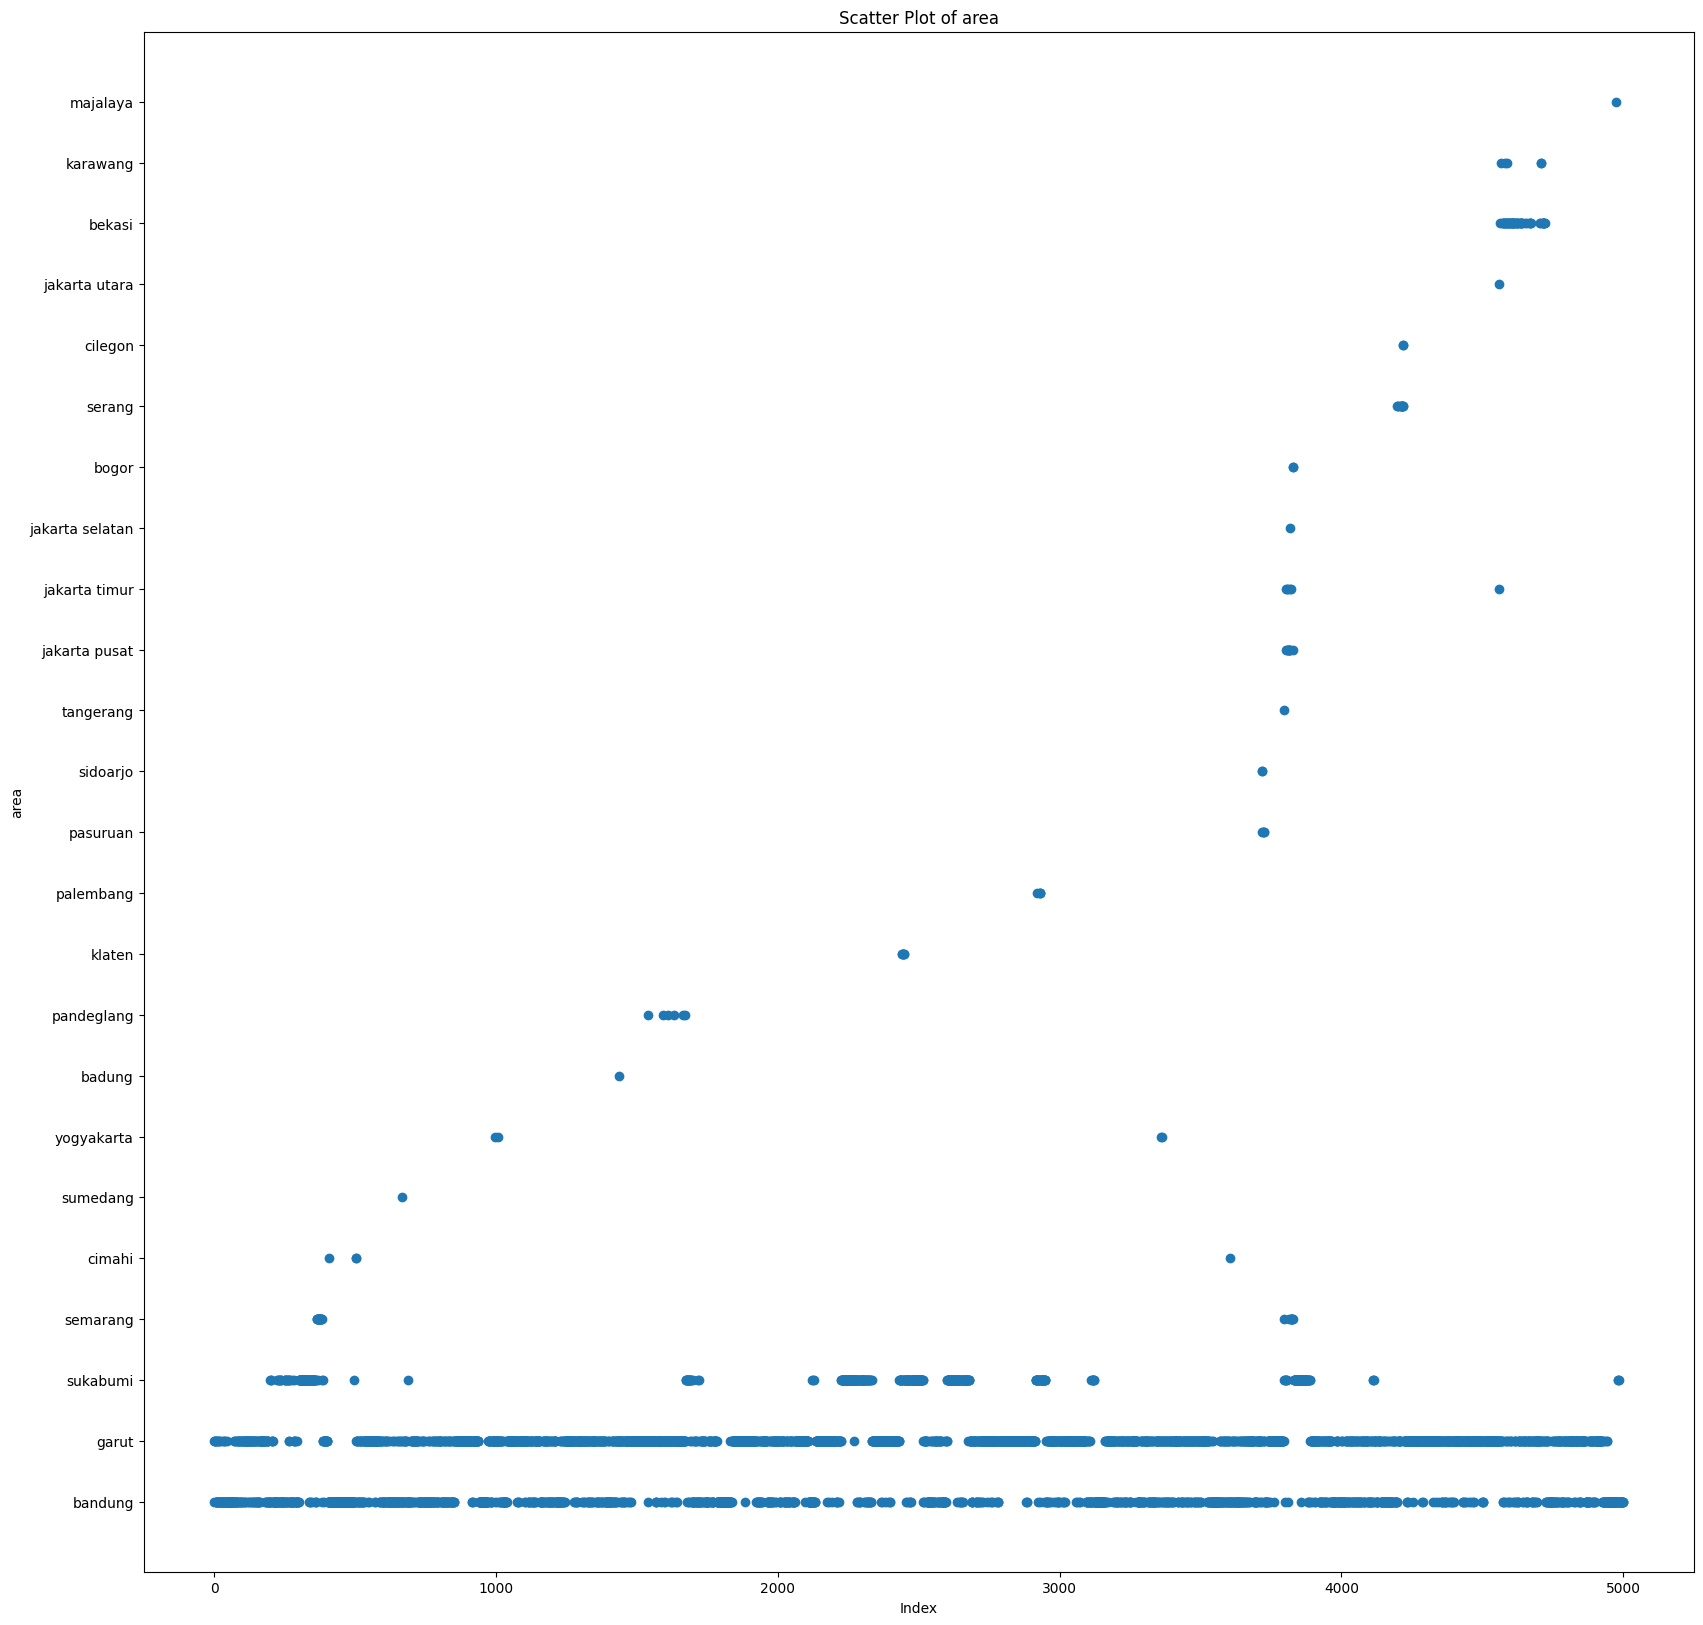

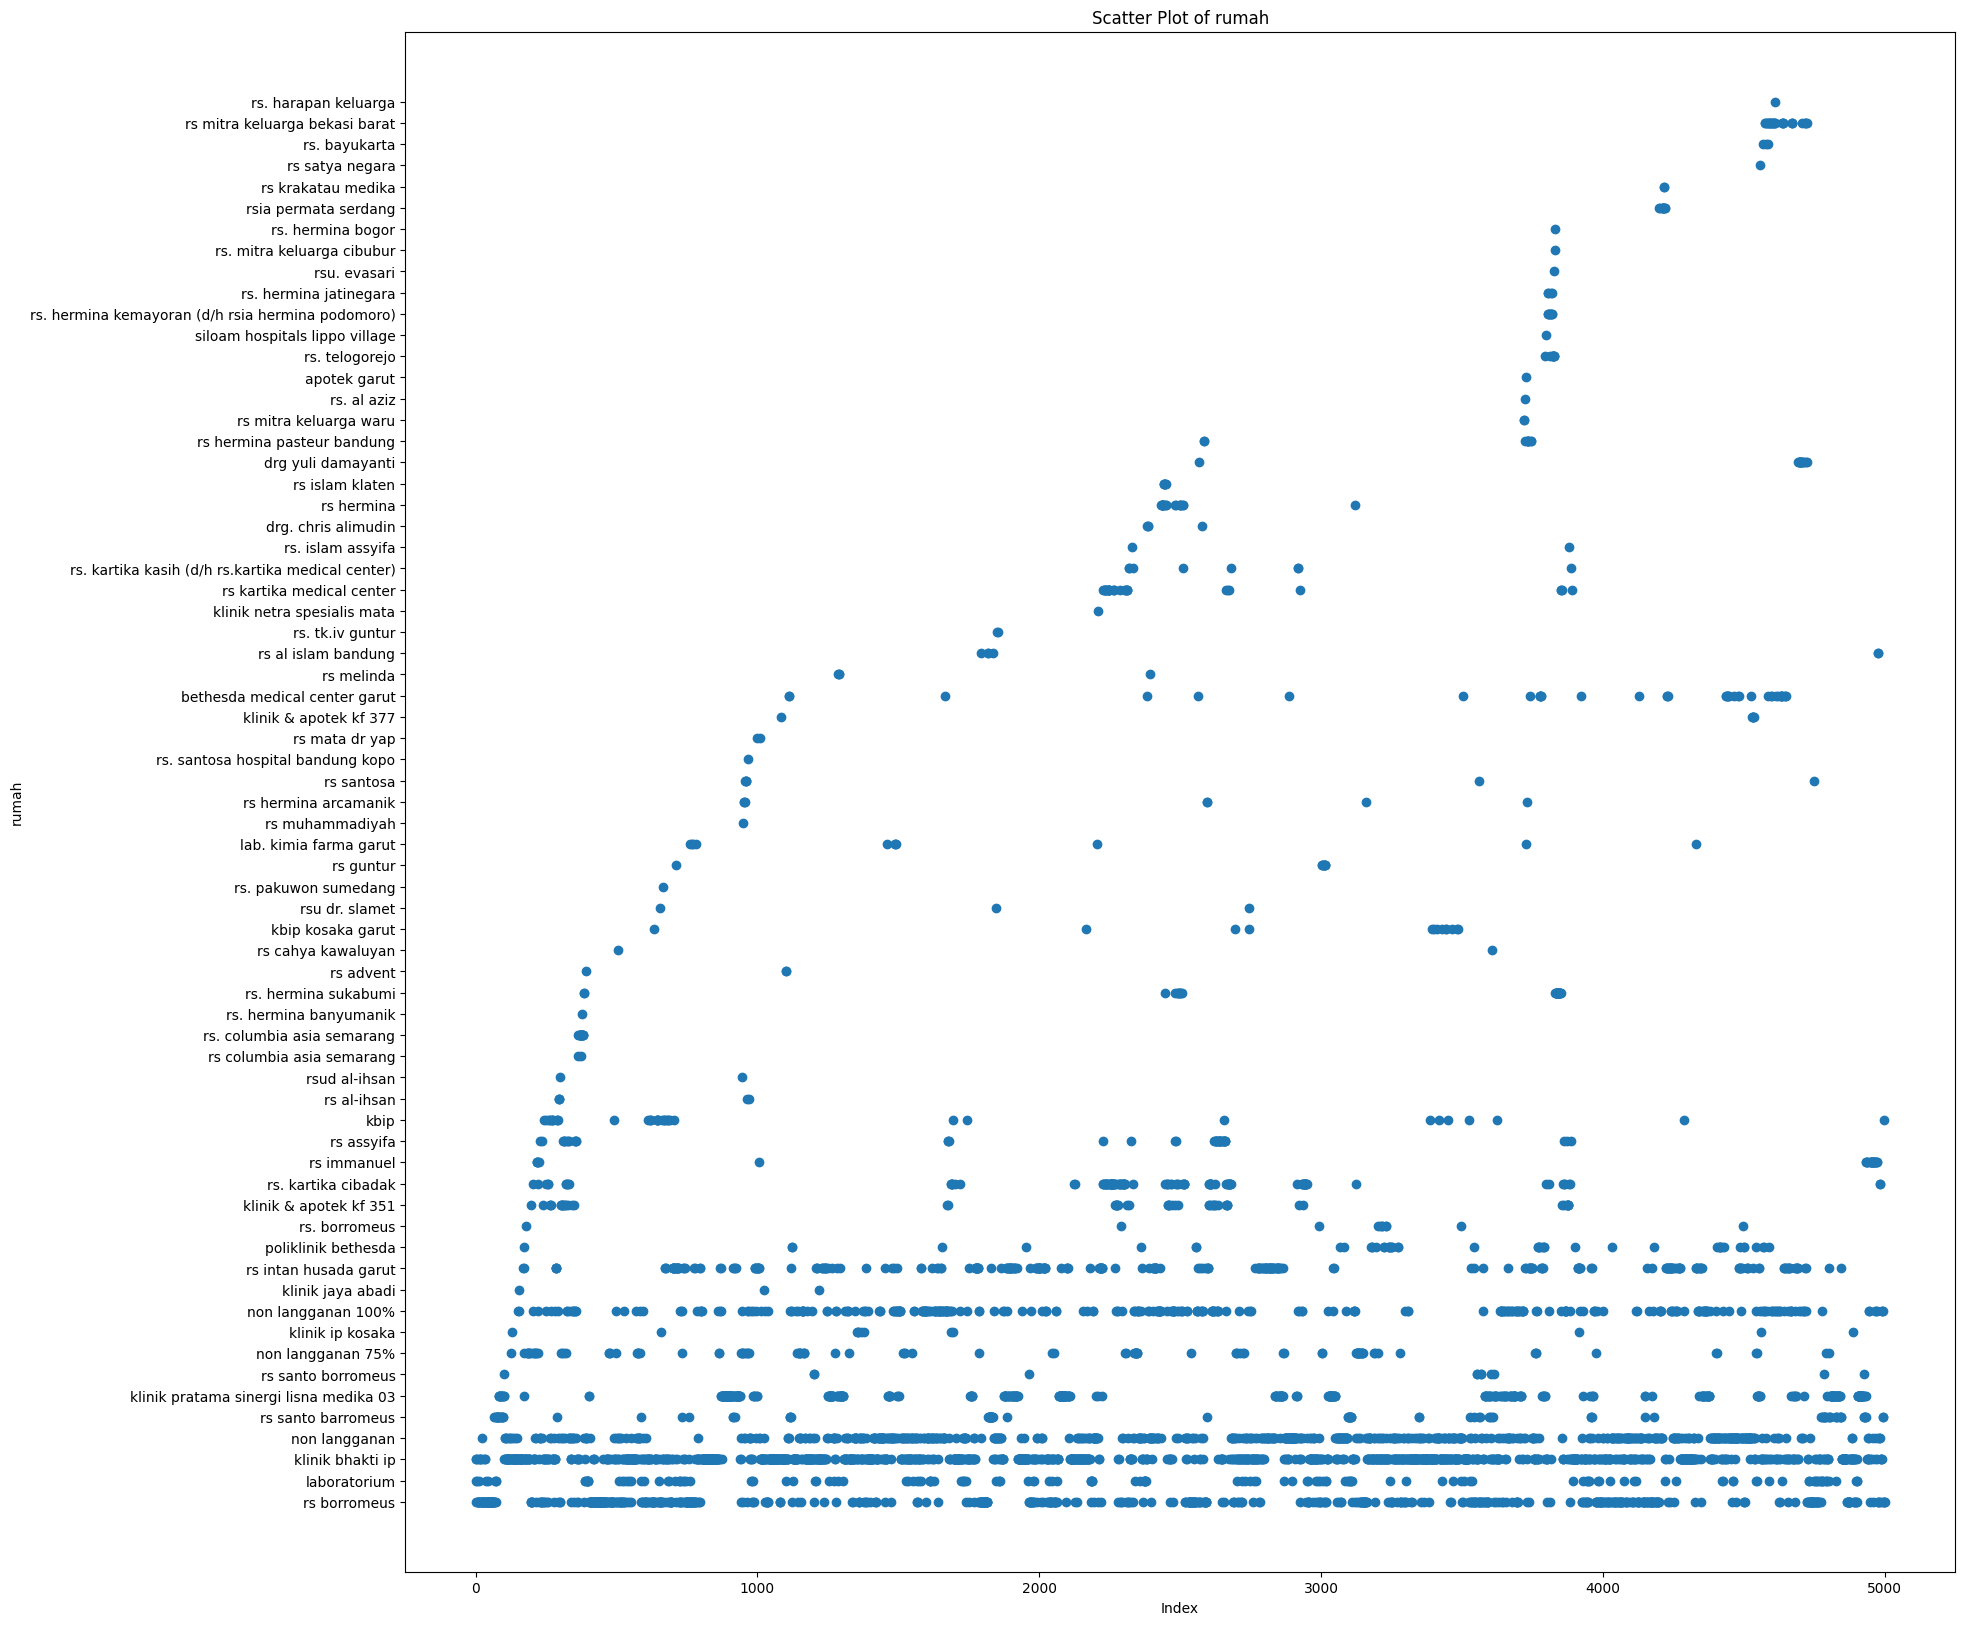

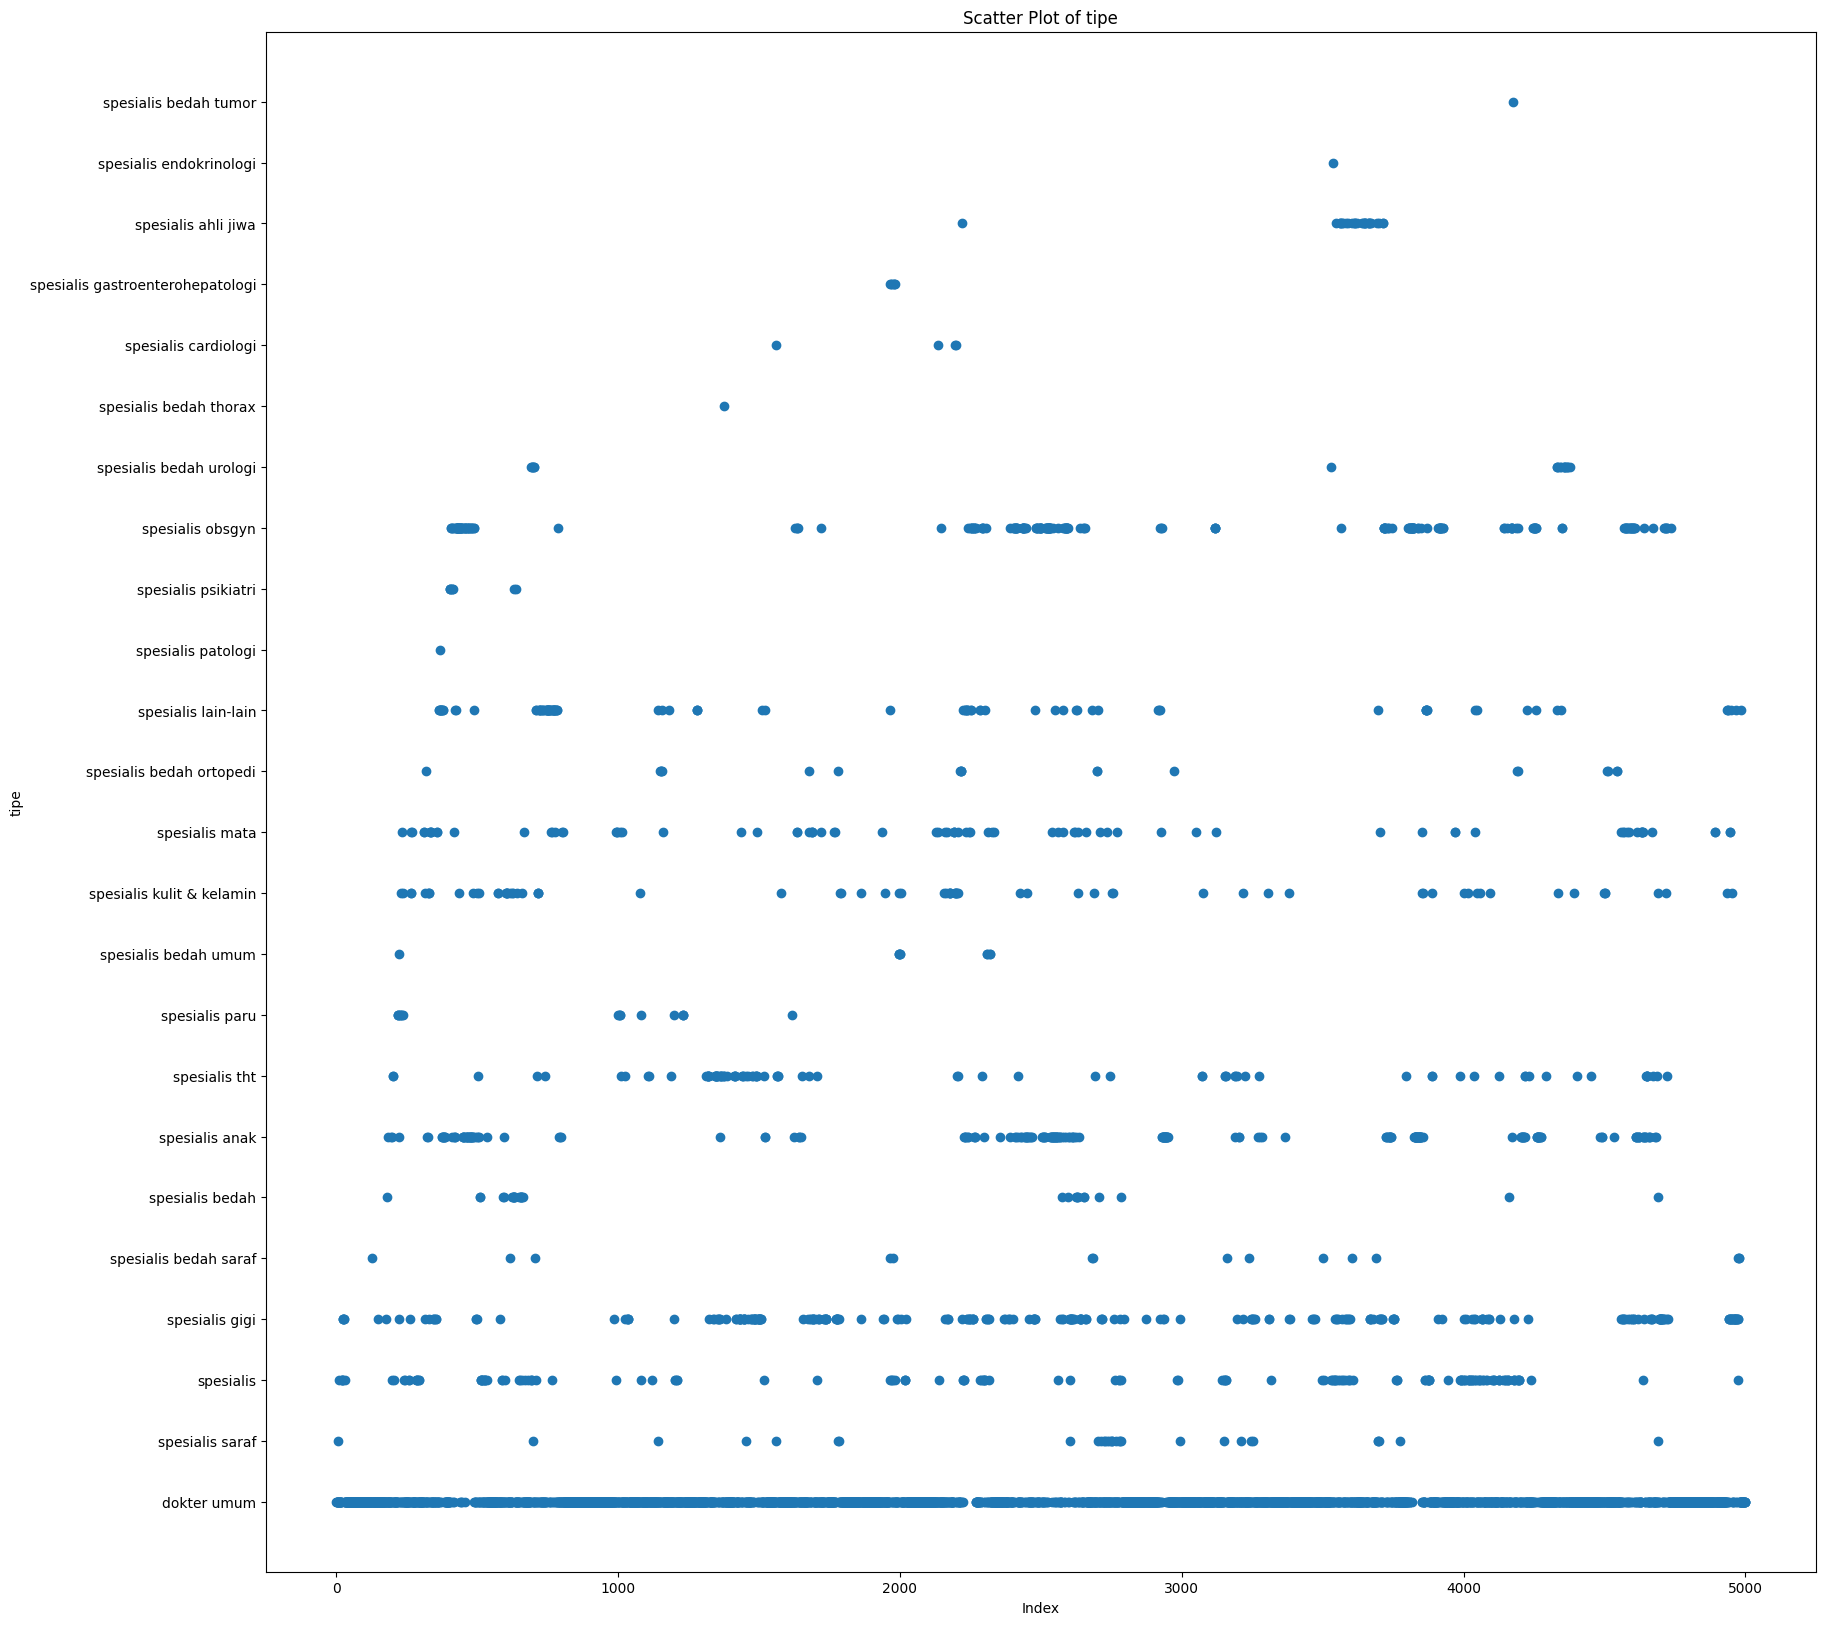

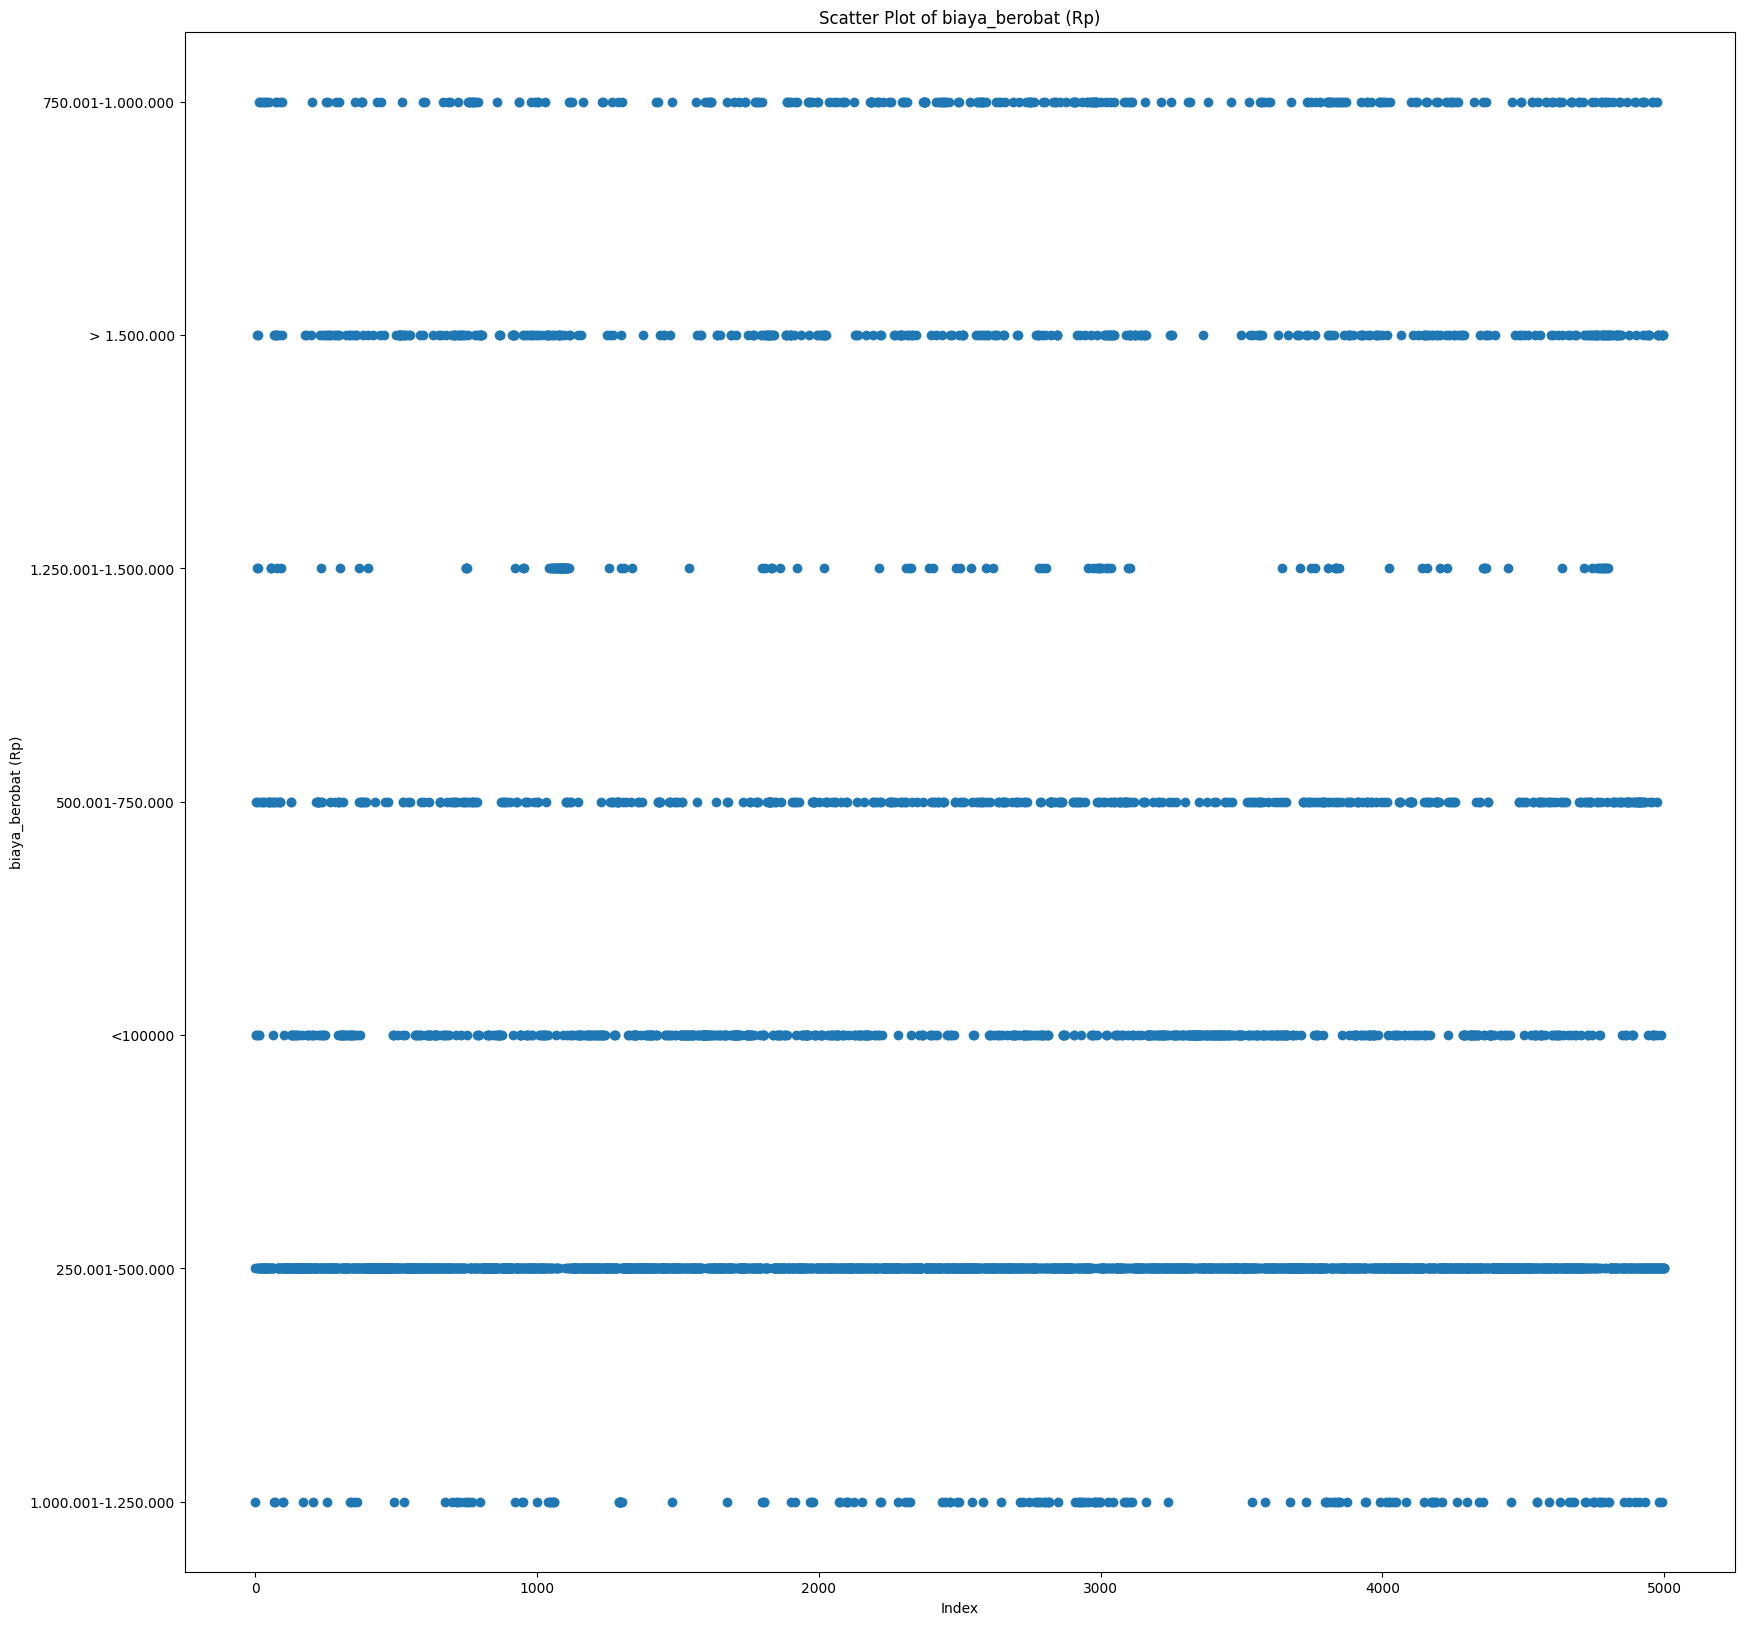

In [ ]:
for column in df.columns:
  plt.figure(figsize=(20, 20))
  plt.scatter(df.index, df[column])
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat (Rp)'])

In [ ]:
dataolahencoding.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat (Rp),diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001-1.250.000,404,5,1,23,0,0
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001-500.000,409,2,6,14,0,2
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip,dokter umum,<100000,409,3,6,8,0,5
3,4,vertigo,poliklinik,garut,klinik bhakti ip,dokter umum,<100000,1270,3,6,8,0,5
4,5,check up,laboratorium,garut,laboratorium,dokter umum,500.001-750.000,119,2,6,14,0,3


In [ ]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat (Rp)'], axis=1)
dataolahencoding.head()

,no,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,404,5,1,23,0,0
1,2,409,2,6,14,0,2
2,3,409,3,6,8,0,5
3,4,1270,3,6,8,0,5
4,5,119,2,6,14,0,3


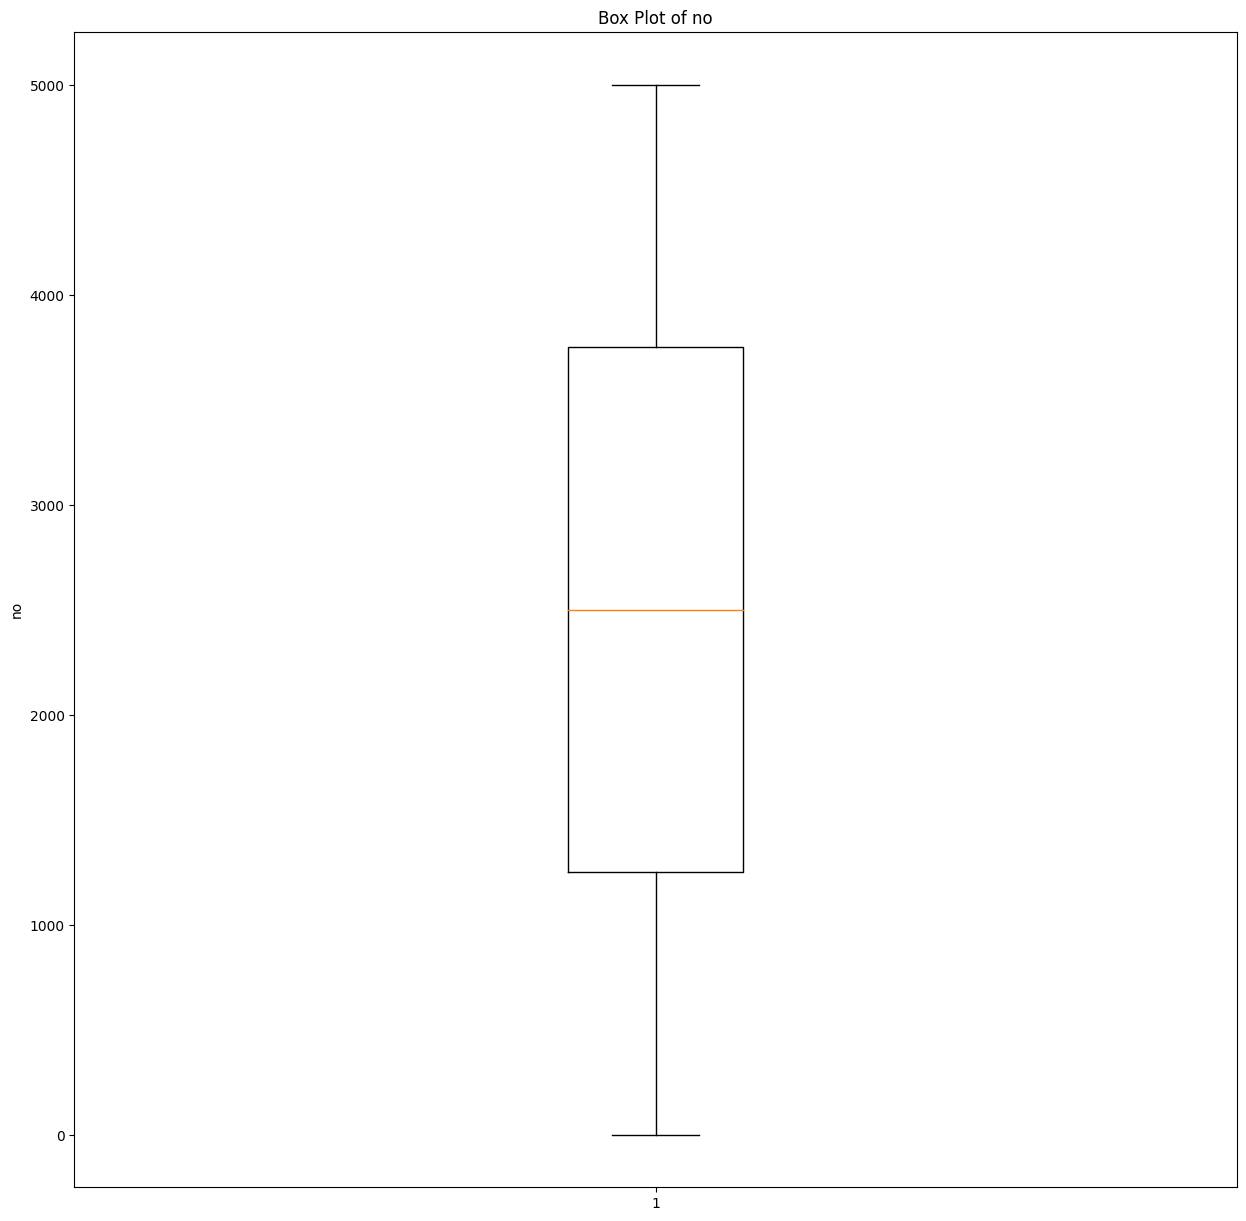

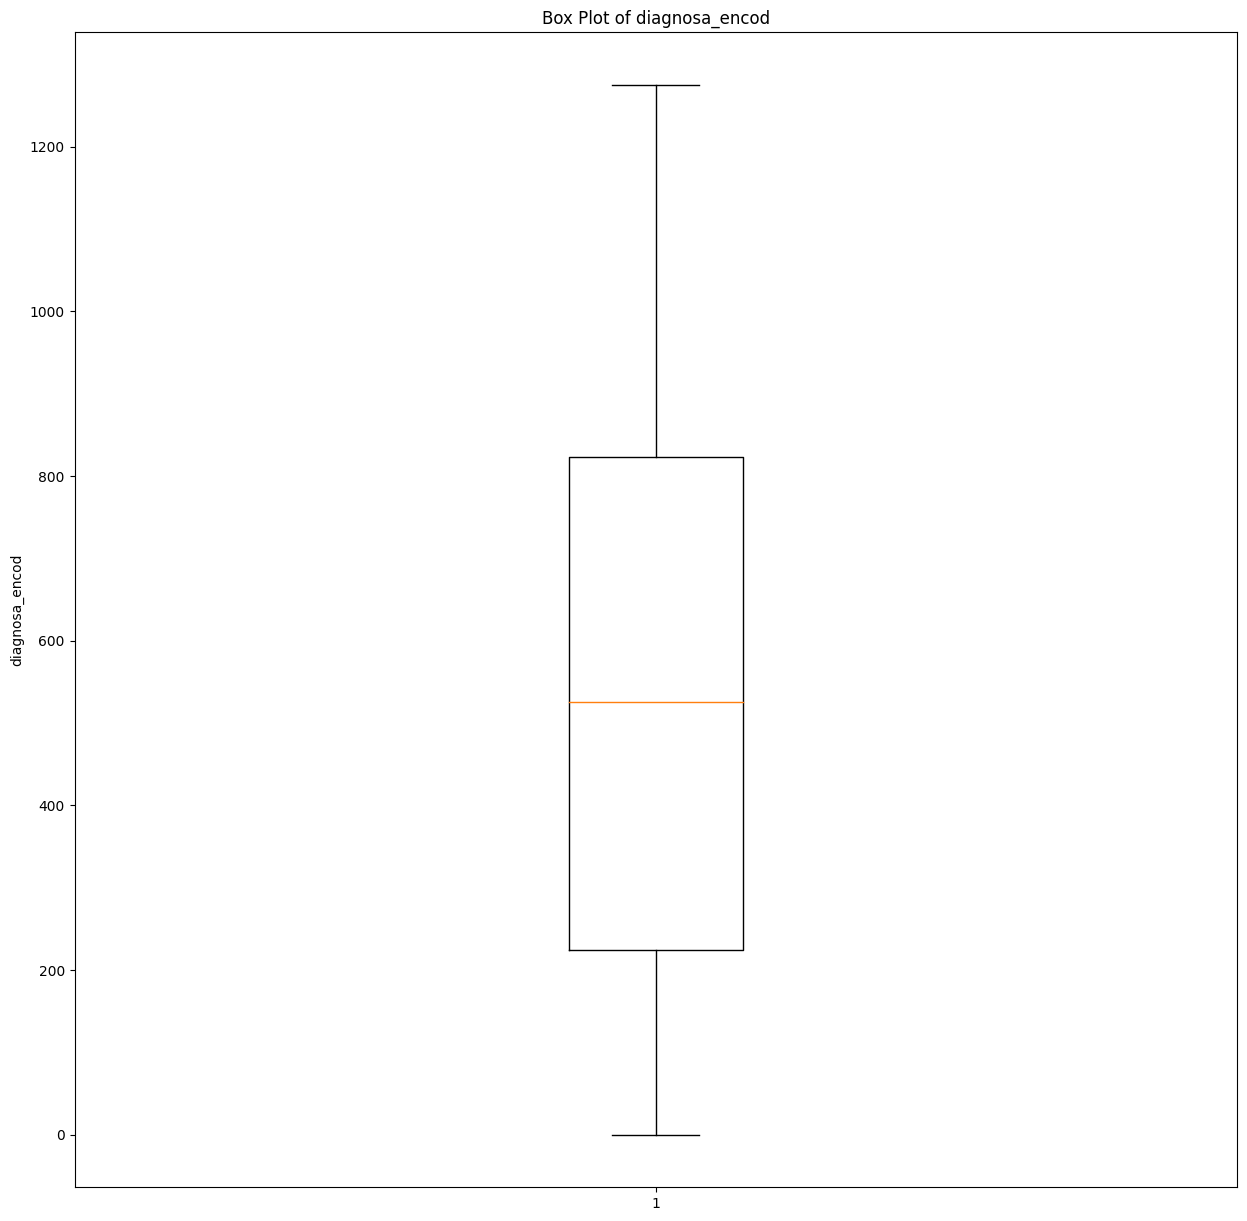

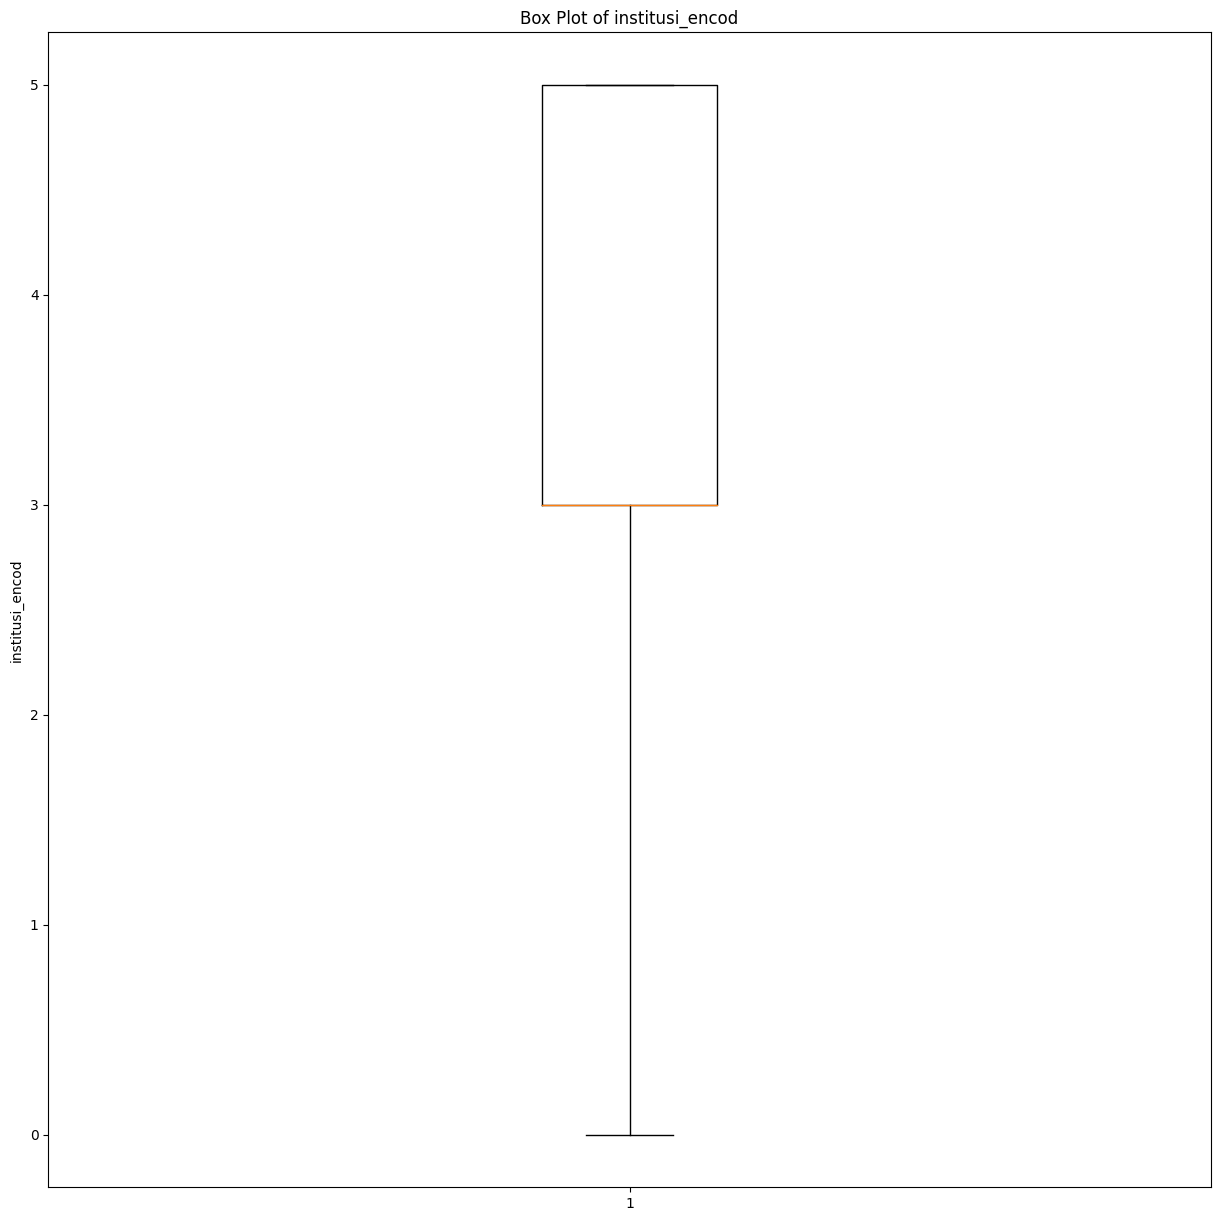

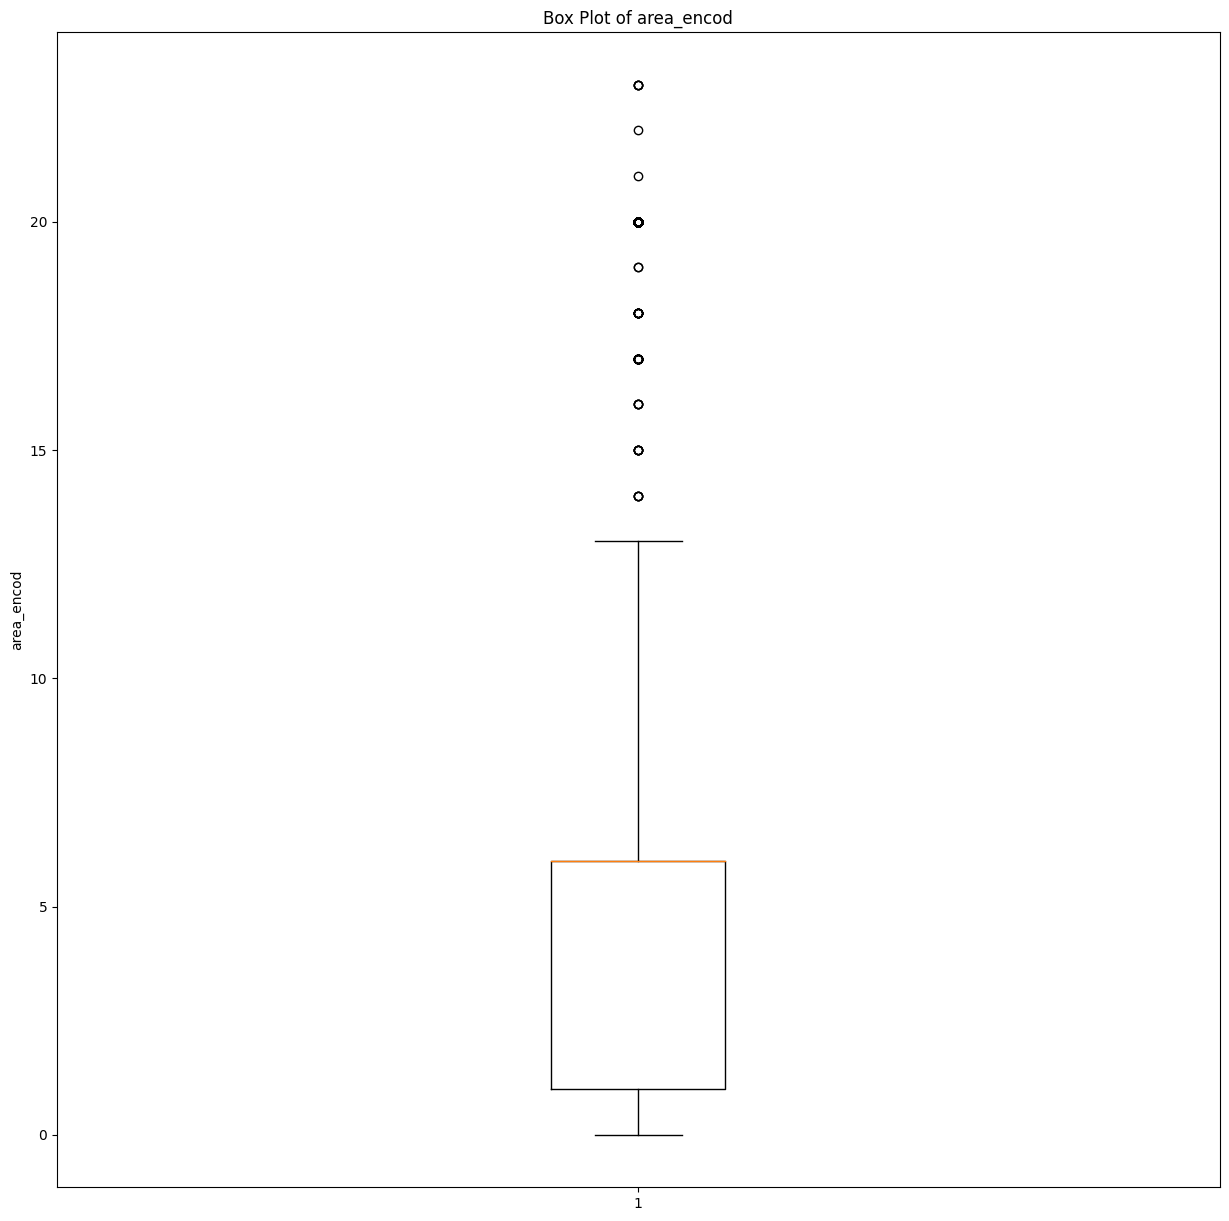

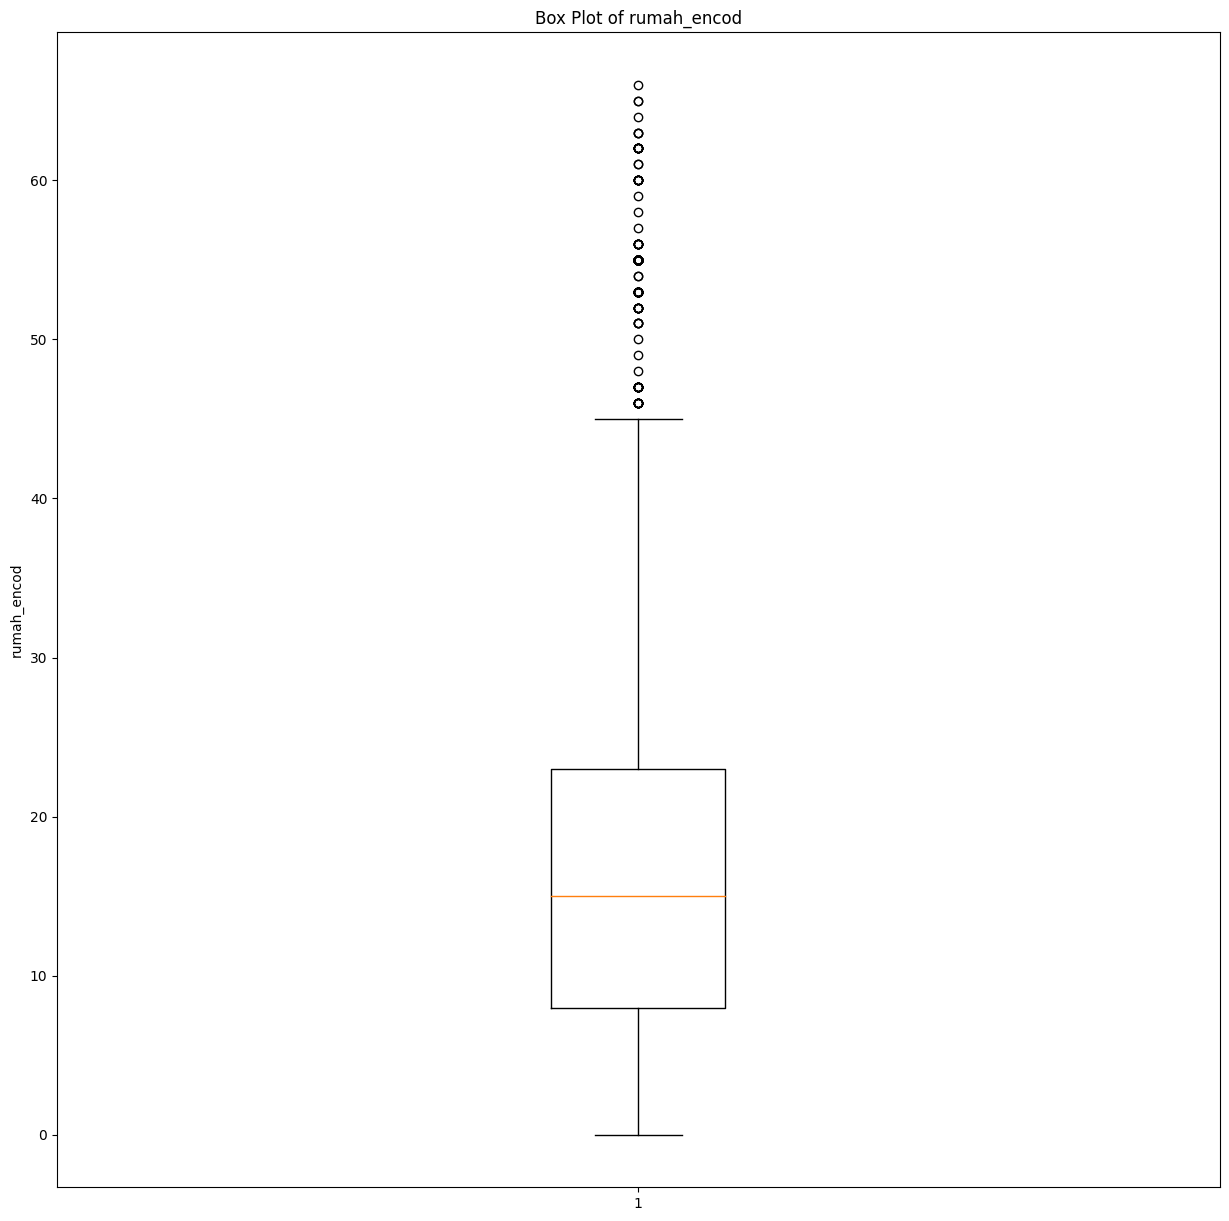

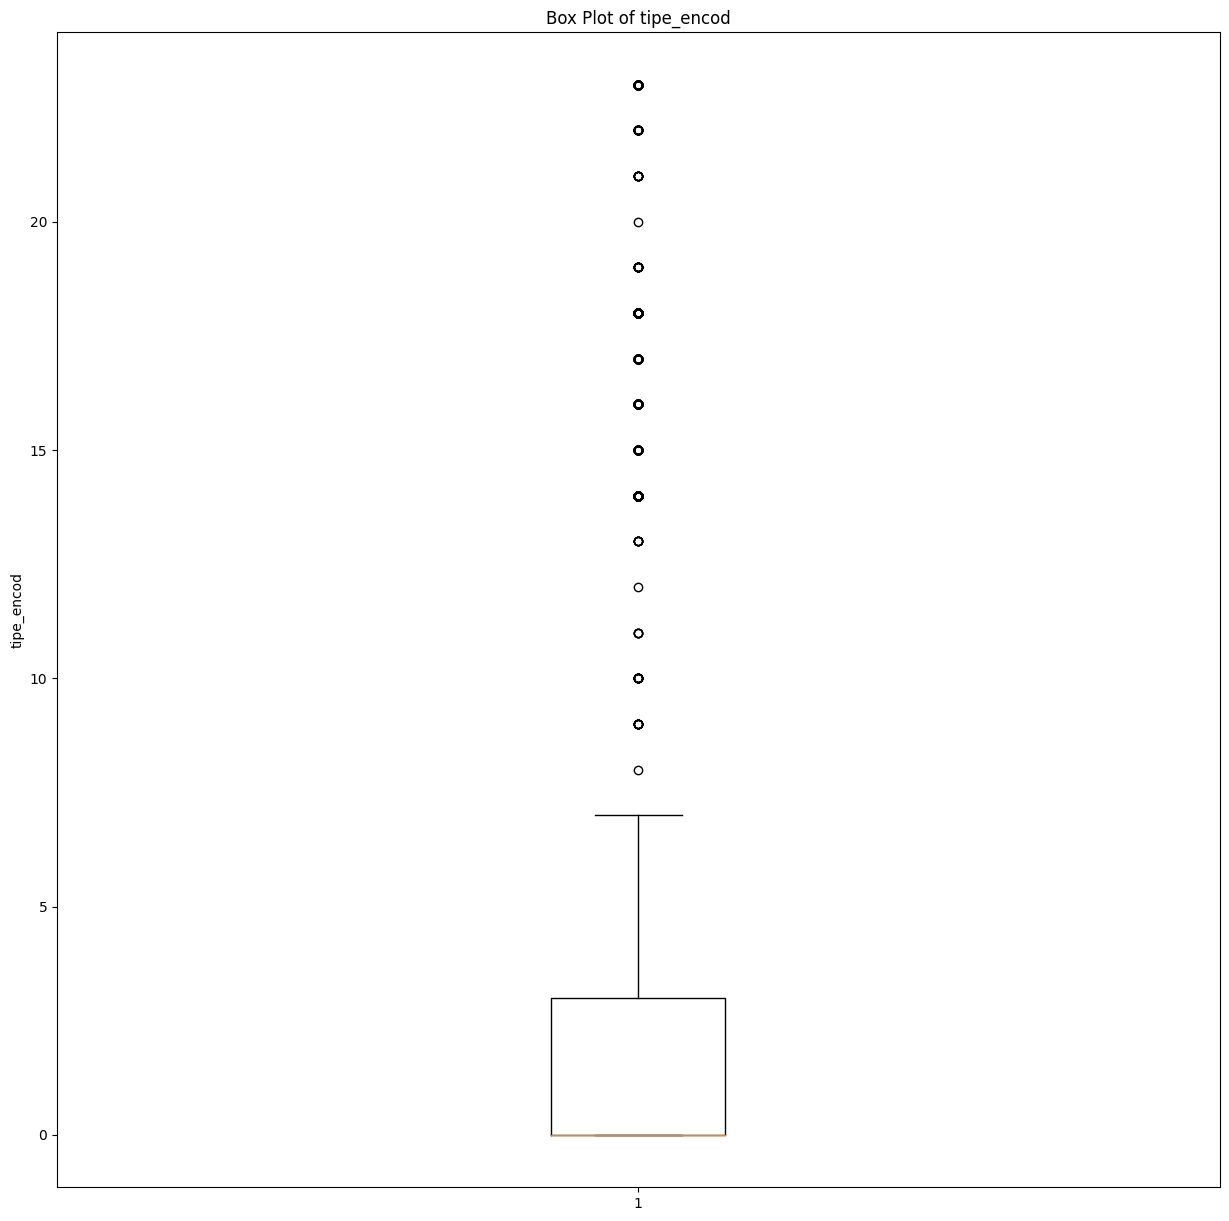

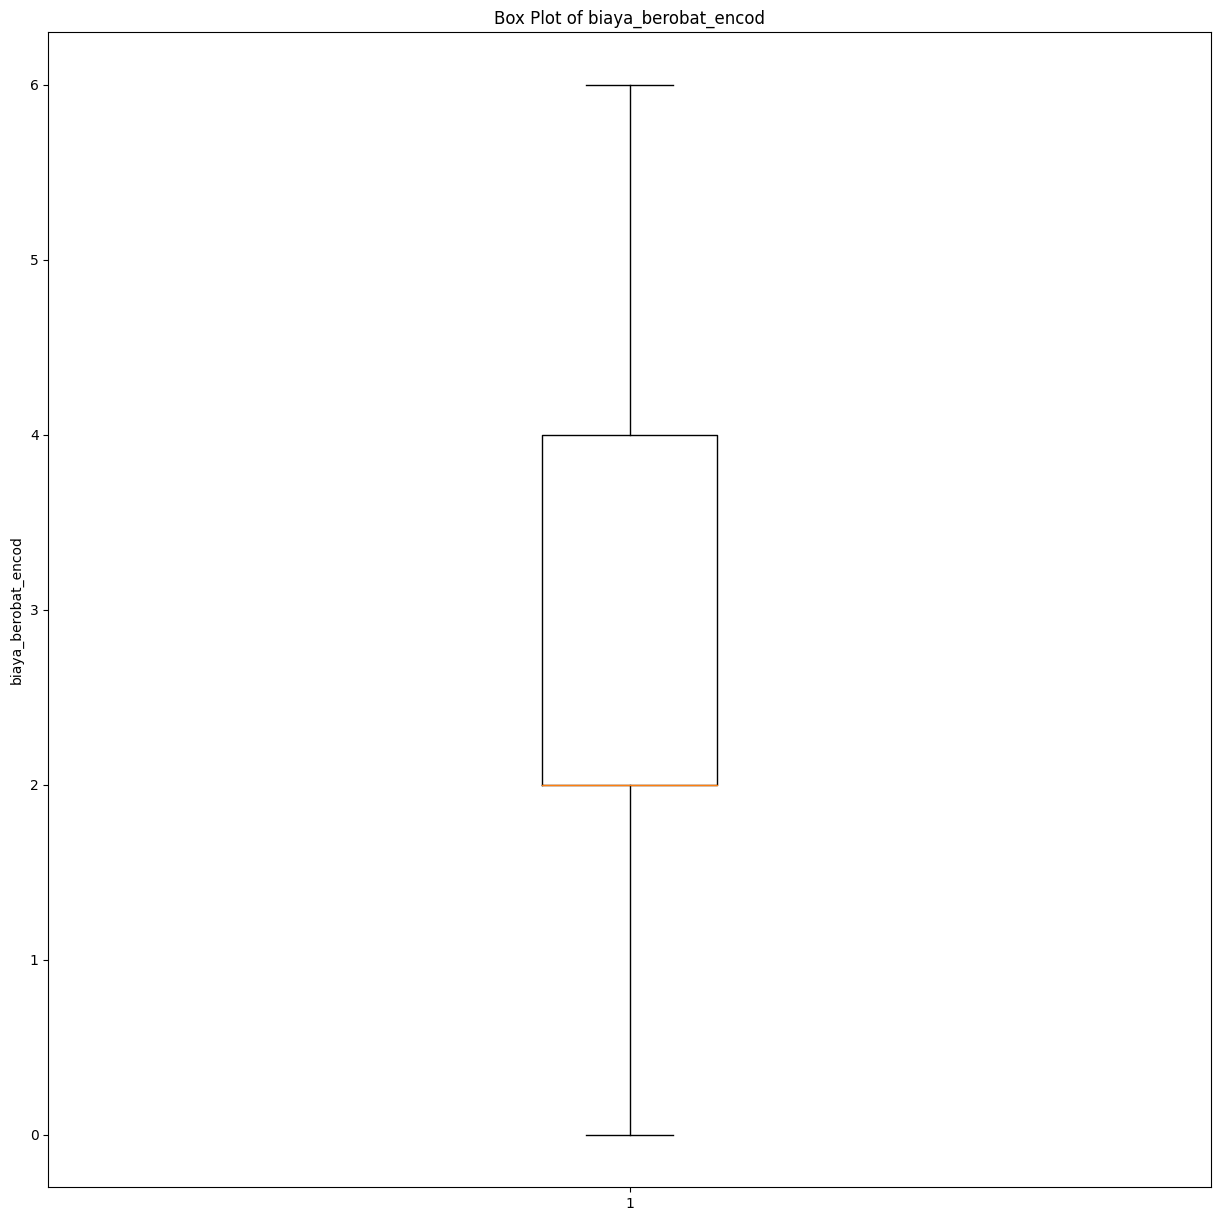

In [ ]:
for column in dataolahencoding.columns:
  plt.figure(figsize=(15, 15))
  plt.boxplot(dataolahencoding[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()


In [ ]:
import numpy as np

def find_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()



Kolom 'area_encod' memiliki outlier:
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 17, 17, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 20, 20, 20, 21, 20, 23, 23, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20

##MULTIVARIATE ANALYSIS

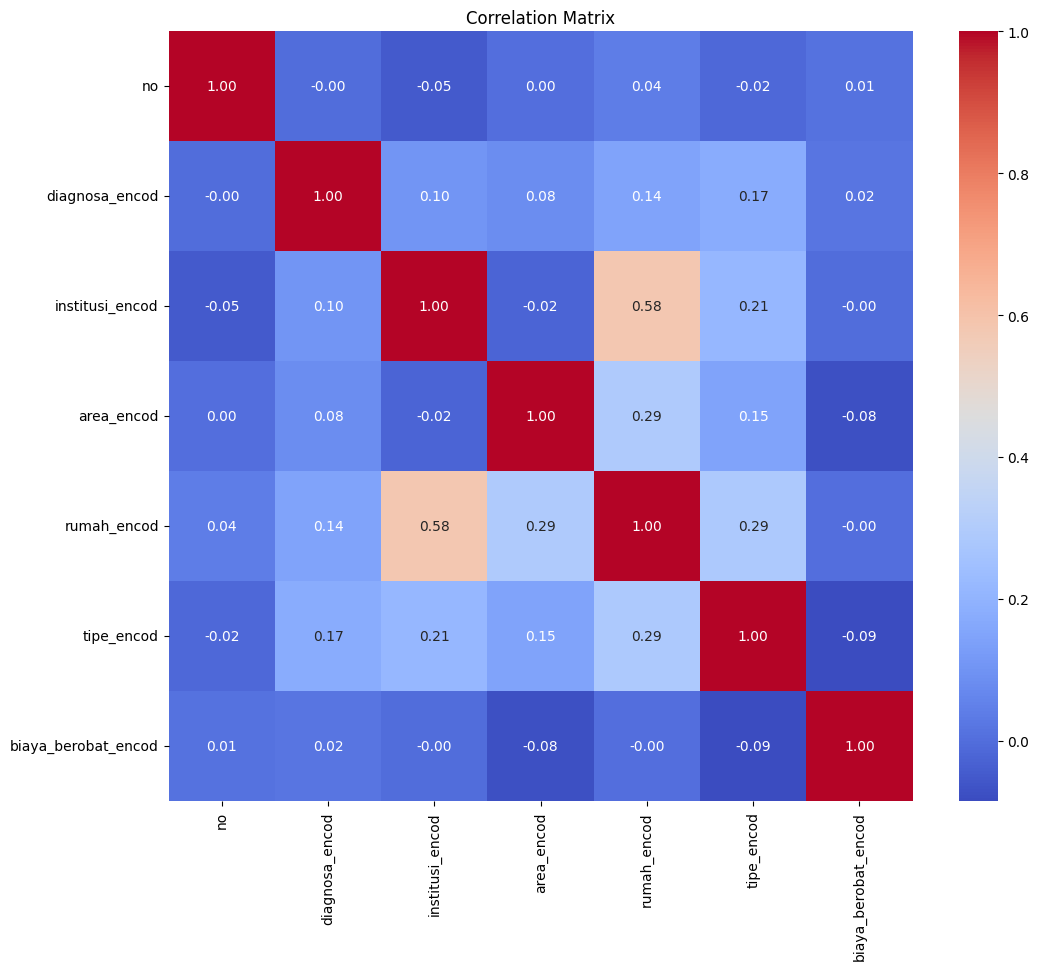

In [ ]:
import seaborn as sns

correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


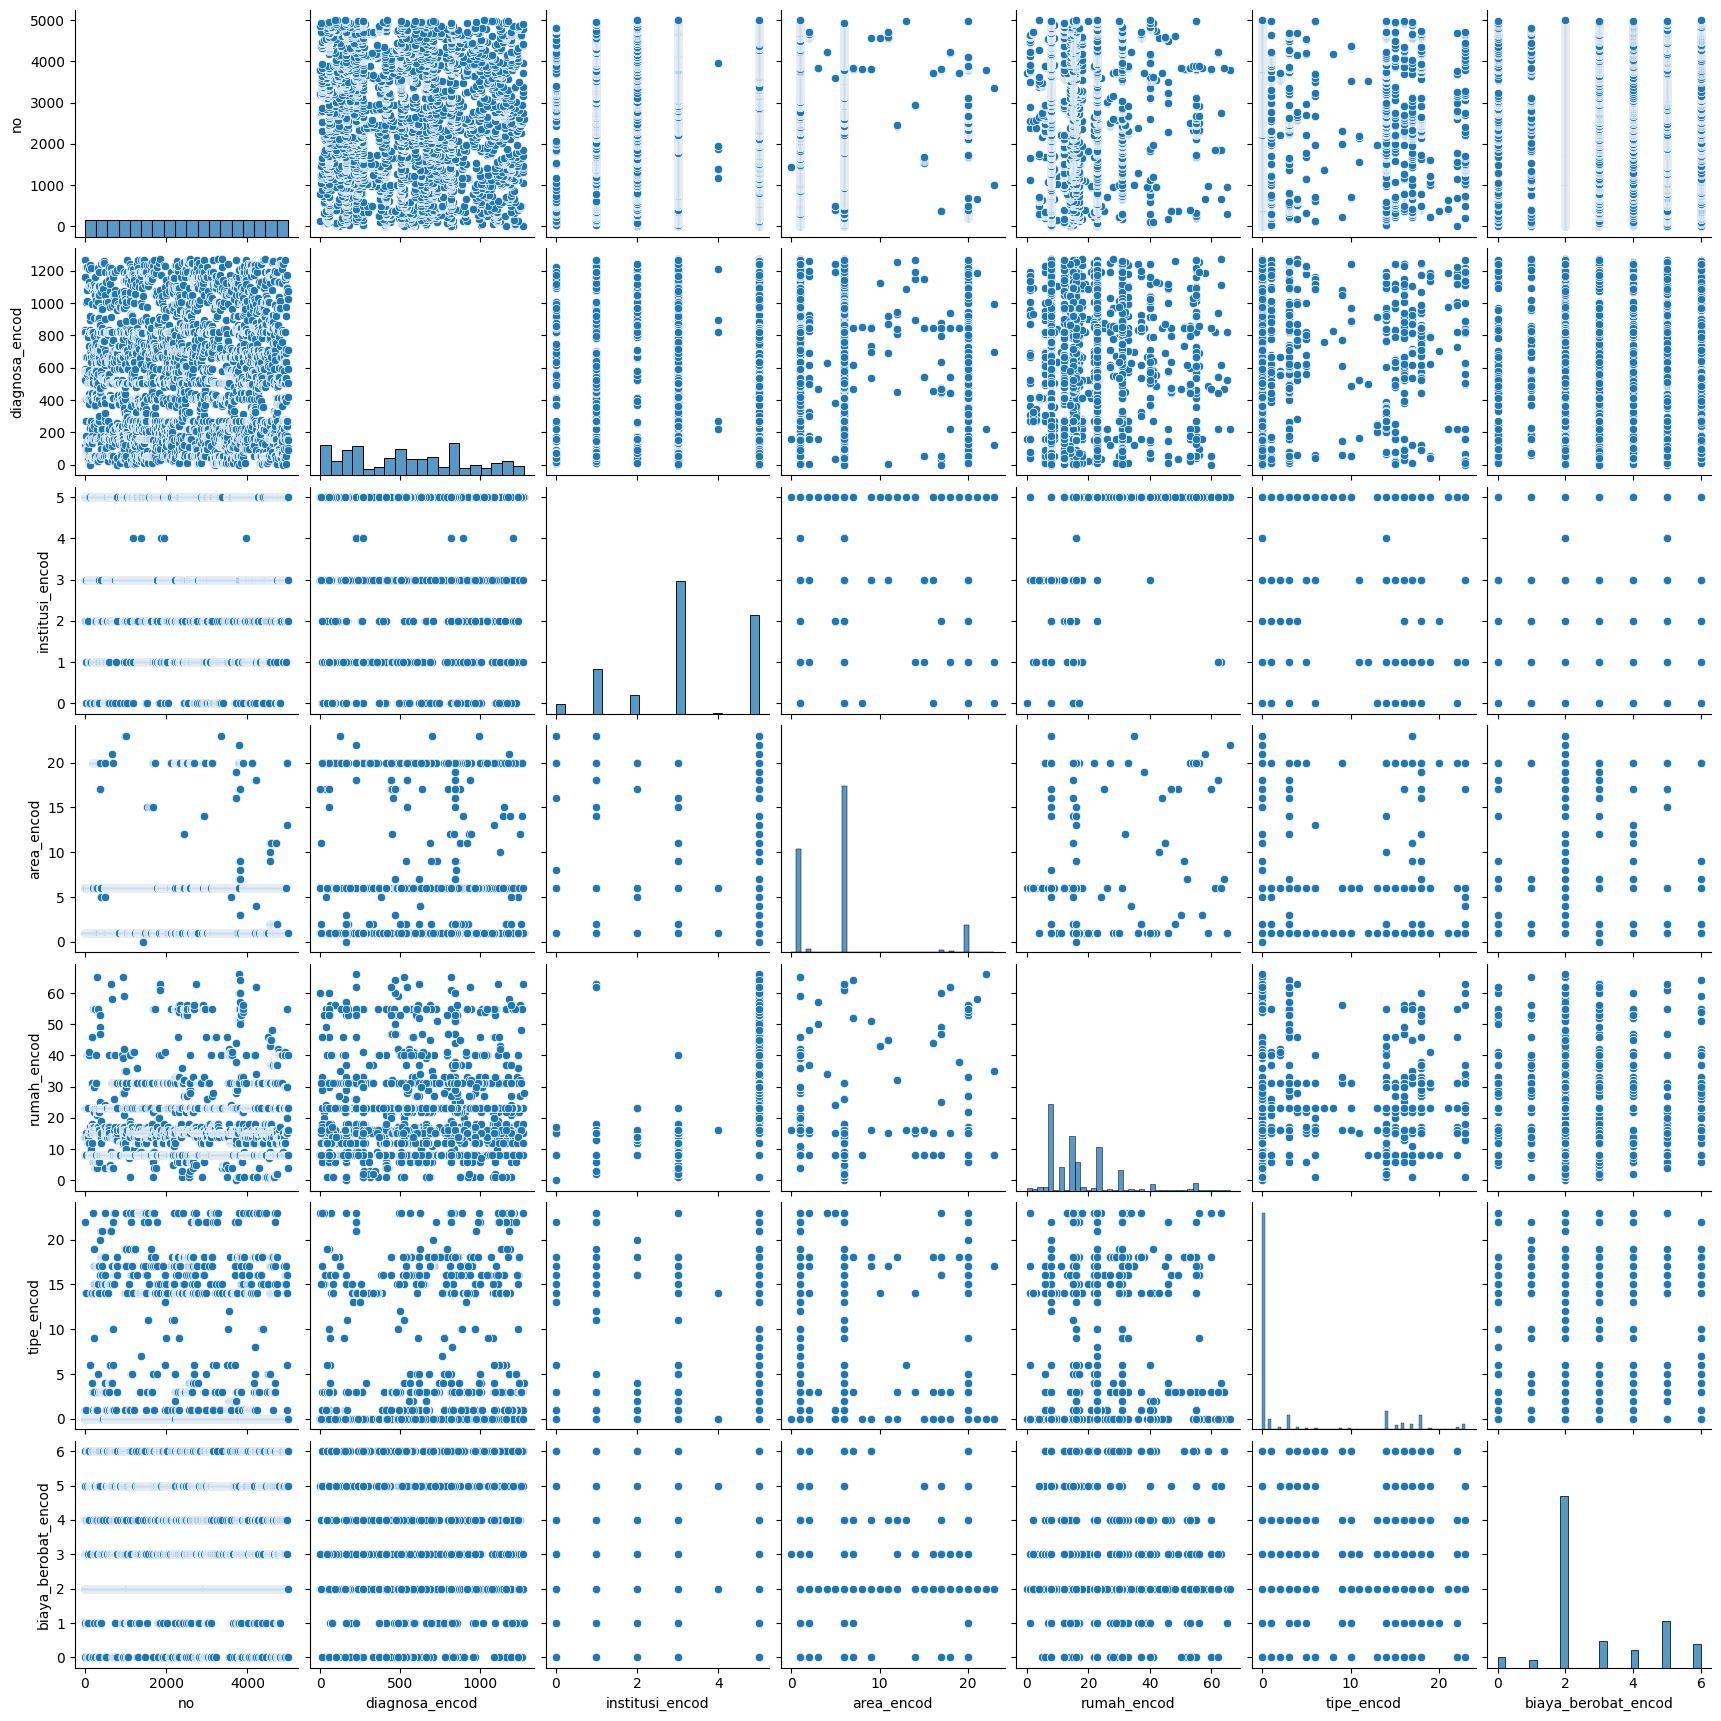

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'dataolahencoding'
# Create a scatterplot matrix using Seaborn's pairplot
sns.pairplot(dataolahencoding)
plt.show()


* Masing-masing scatter plot menunjukkan hubungan antara dua variabel.Jika terdapat pola tertentu (misalnya, hubungan linear, kurva, atau sebaran acak), itu menunjukkan apakah ada korelasi atau hubungan antara kedua variabel tersebut.
* Contohnya, di scatter plot antara "rumah_encod" dan "tipe_encod", ada sebaran yang mungkin menunjukkan pola-pola tertentu.

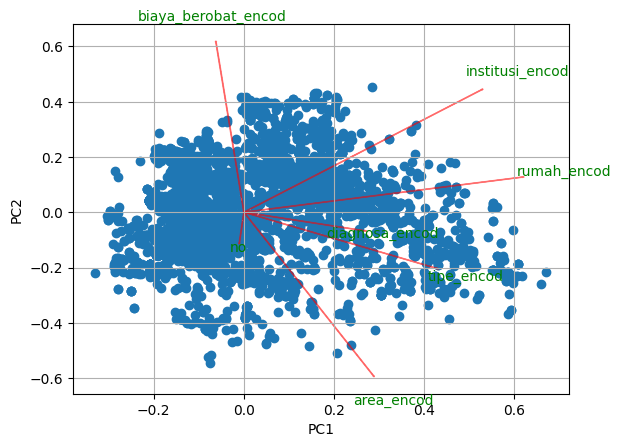

In [ ]:
# prompt: create Biplot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'dataolahencoding'

# 1. Standardize the data
x = dataolahencoding.values
x = StandardScaler().fit_transform(x)

# 2. Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# 3. Create the Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),list(dataolahencoding.columns))
plt.show()



*   Sumbu horizontal (PC1) dan sumbu vertikal (PC2) adalah komponen utama yang dihasilkan dari analisis PCA. PCA digunakan untuk mereduksi dimensi dataset dengan mengubah variabel-variabel asli menjadi beberapa komponen utama (principal components), sambil mempertahankan sebanyak mungkin informasi.
*   Setiap titik biru pada plot ini mewakili satu observasi (baris data) dari dataset yang telah diproyeksikan ke dalam dua komponen utama, PC1 dan PC2. Titik-titik ini menggambarkan bagaimana observasi didistribusikan dalam ruang komponen baru.

*   Panah merah yang berasal dari pusat plot menunjukkan kontribusi variabel asli terhadap komponen utama. Panjang dan arah panah menunjukkan seberapa besar pengaruh suatu variabel terhadap komponen-komponen tersebut. Contohnya, "rumah_encod" dan "tipe_encod" tampaknya memiliki kontribusi yang lebih besar terhadap PC1, sementara "biaya_berobat_encod" lebih terhubung dengan PC2.



